<h1>Projet 4<br />
Anticipez les besoins en consommation des bâtiments</h1><br />

<h1>Notebook prédiction 1 - Emissions $CO_2$</h1>

Dans ce notebook, nous allons étudier différents modèles de machine learning pour prédire les émissions du $CO_2$ des batîments. Les modèles qui seront traités dans ce projet sont : 

- **Baseline** :  Regression linéaire avec le Linear Regressor
- **Modèles linéaires** : SVR, ElasticNet
- **Modèles non-linéaires** : Random Forest Regressor, XGBoost.

# Analyse sur les données
<font color="#8A2BE2"><h1>1. Lecture des données  </h1><a class="anchor" id="section_1"></a></font>

In [1]:
#Importation des librairies

import numpy as np
import pandas as pd

#Graphiques
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

#Avertissements
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lecture des données 
data=pd.read_csv("data_projet_4.csv")
data.describe().T

count          mean           std  \
OSEBuildingID                    1647.0  1.632783e+04  1.385154e+04   
DataYear                         1647.0  2.016000e+03  0.000000e+00   
CouncilDistrictCode              1647.0  4.354584e+00  2.190075e+00   
Latitude                         1647.0  4.761619e+01  4.830210e-02   
Longitude                        1647.0 -1.223329e+02  2.462425e-02   
NumberofBuildings                1647.0  1.168185e+00  2.946713e+00   
NumberofFloors                   1647.0  4.134183e+00  6.600717e+00   
PropertyGFATotal                 1647.0  1.187899e+05  2.974650e+05   
LargestPropertyUseTypeGFA        1647.0  9.860671e+04  2.768566e+05   
SecondLargestPropertyUseTypeGFA  1647.0  1.861713e+04  5.098051e+04   
ThirdLargestPropertyUseTypeGFA   1647.0  3.180383e+03  1.807494e+04   
ENERGYSTARScore                  1082.0  6.516543e+01  2.837699e+01   
SiteEnergyUse(kBtu)              1647.0  8.482189e+06  3.039304e+07   
TotalGHGEmissions                1647.0  1.866603e+02  7.560775e+02   
BuildingAge                      1647.0  5.382696e+01  3.263804e+01   
TotalUseTypeNumber               1647.0  1.899818e+00  1.226596e+00   
GFABuildingRate                  1647.0  9.388006e-01  1.398615e-01   
GFAParkingRate                   1647.0  6.119939e-02  1.398615e-01   
GFAPerBuilding                   1647.0           inf           NaN   
GFAPerFloor                      1647.0           inf           NaN   
harvesine_distance               1647.0  2.829585e+00  2.214159e+00   

                                         min           25%           50%  \
OSEBuildingID                        1.00000  5.805000e+02  2.114100e+04   
DataYear                          2016.00000  2.016000e+03  2.016000e+03   
CouncilDistrictCode                  1.00000  2.000000e+00  4.000000e+00   
Latitude                            47.49917  4.758535e+01  4.761252e+01   
Longitude                         -122.41182 -1.223433e+02 -1.223329e+02   
NumberofBuildings                    0.00000  1.000000e+00  1.000000e+00   
NumberofFloors                       0.00000  1.000000e+00  2.000000e+00   
PropertyGFATotal                 11285.00000  2.951650e+04  4.968000e+04   
LargestPropertyUseTypeGFA         5656.00000  2.567000e+04  4.407800e+04   
SecondLargestPropertyUseTypeGFA      0.00000  0.000000e+00  0.000000e+00   
ThirdLargestPropertyUseTypeGFA       0.00000  0.000000e+00  0.000000e+00   
ENERGYSTARScore                      1.00000  4.800000e+01  7.300000e+01   
SiteEnergyUse(kBtu)                  0.00000  1.253035e+06  2.582687e+06   
TotalGHGEmissions                   -0.80000  2.056000e+01  4.998000e+01   
BuildingAge                          1.00000  2.700000e+01  5.000000e+01   
TotalUseTypeNumber                   1.00000  1.000000e+00  2.000000e+00   
GFABuildingRate                      0.10498  1.000000e+00  1.000000e+00   
GFAParkingRate                       0.00000  0.000000e+00  0.000000e+00   
GFAPerBuilding                    4300.00000  2.908150e+04  4.995100e+04   
GFAPerFloor                        221.69700  1.330492e+04  2.298000e+04   
harvesine_distance                   0.02113  8.798864e-01  2.322656e+00   

                                          75%           max  
OSEBuildingID                    2.460050e+04  5.022600e+04  
DataYear                         2.016000e+03  2.016000e+03  
CouncilDistrictCode              7.000000e+00  7.000000e+00  
Latitude                         4.764976e+01  4.773387e+01  
Longitude                       -1.223217e+02 -1.222586e+02  
NumberofBuildings                1.000000e+00  1.110000e+02  
NumberofFloors                   4.000000e+00  9.900000e+01  
PropertyGFATotal                 1.055500e+05  9.320156e+06  
LargestPropertyUseTypeGFA        9.200300e+04  9.320156e+06  
SecondLargestPropertyUseTypeGFA  1.269300e+04  6.399310e+05  
ThirdLargestPropertyUseTypeGFA   0.000000e+00  4.597480e+05  
ENERGYSTARScore                  8.900000e+01  1.00000

GFAPerBuilding et GFAPerFloor contiennent des valeurs à l'infini, nous allons corriger cela.

In [3]:
data['GFAPerBuilding'] = np.where(((data.GFAPerBuilding == np.inf) & (data.NumberofBuildings == 0)),0, data.GFAPerBuilding)
data['GFAPerFloor'] = np.where(((data.GFAPerFloor == np.inf) & (data.NumberofFloors == 0)),0, data.GFAPerFloor)

Recherchons maintenant les valeurs atypiques :

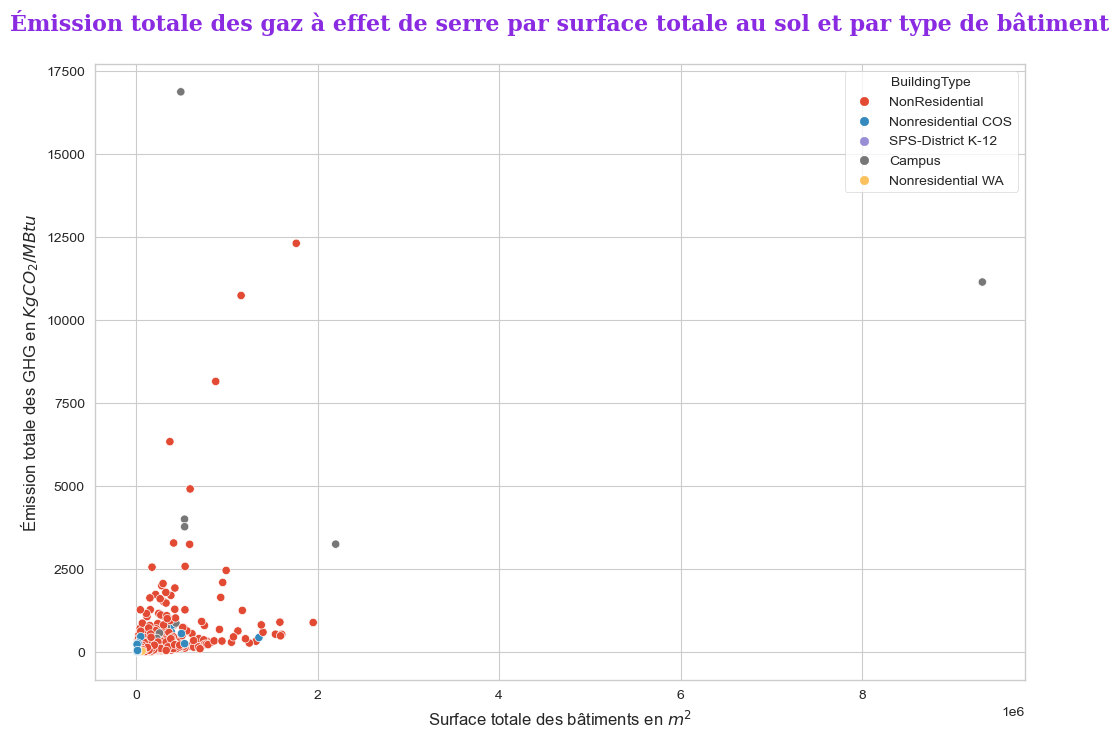

In [4]:
font_title = {'family': 'serif',
              'color':  '#8A2BE2',
              'weight': 'bold',
              'size': 20,
             }

#figure 1 Émissions GHG
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Émission totale des gaz à effet de serre par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xlabel('Surface totale des bâtiments en $m^2$')
plt.ylabel('Émission totale des GHG en $Kg CO_2 /MBtu$')
plt.show()

La majorité des bâtiments ont une surface totale inférieure à 2 000 000 $m^2$ et émettent < 5000 Kg $CO_2$ /MBtu. 

Éliminons les valeurs négatives des émissions : 

In [5]:
data[data['TotalGHGEmissions']<0]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
1584          49784      2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address     City State  ZipCode  \
1584  Bullitt Center  1501 E. Madison St.  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  ...  ENERGYSTARScore SiteEnergyUse(kBtu)  \
1584                    7234600195  ...            100.0         342726.0938   

      TotalGHGEmissions  BuildingAge  TotalUseTypeNumber  GFABuildingRate  \
1584               -0.8            3                   1              1.0   

      GFAParkingRate GFAPerBuilding  GFAPerFloor harvesine_distance  
1584             0.0        52000.0     8666.667           1.068066  

[1 rows x 34 columns]

In [6]:
data=data.loc[data['TotalGHGEmissions']>=0]

Effectuons également une étude pour consernant la consommation énergétique des batîments pour noter les anomalies :

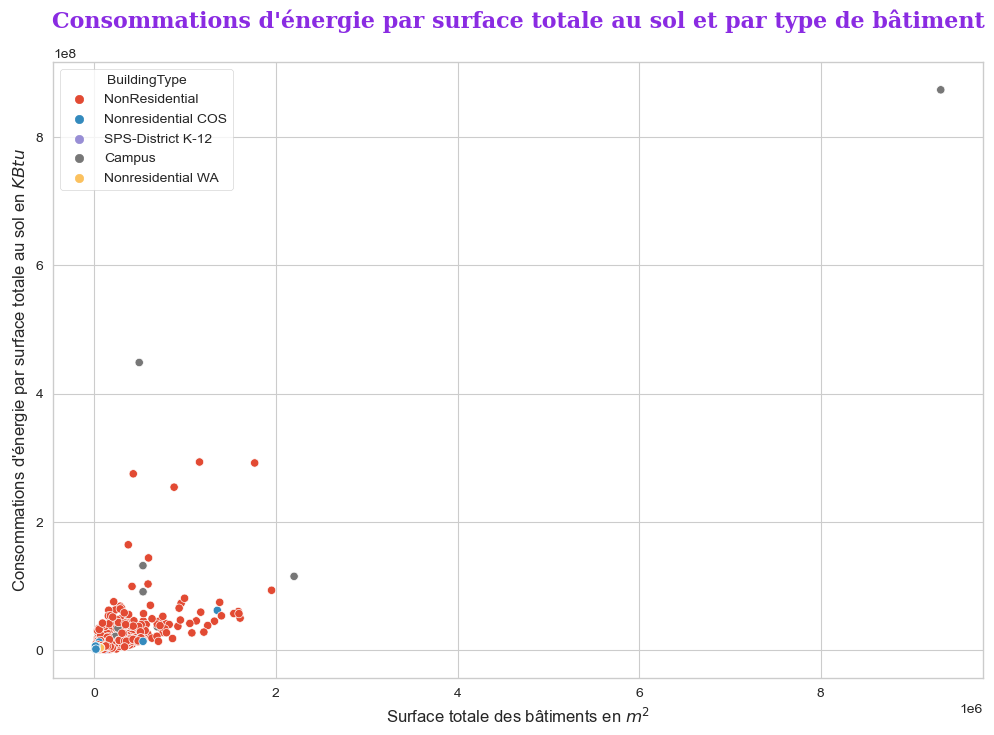

In [7]:
#figure 2 consommation d'énergie
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xlabel('Surface totale des bâtiments en $m^2$')
plt.ylabel("Consommations d'énergie par surface totale au sol en $KBtu$")
plt.show()

Un bâtiment de type campus est très supérieur aux autres données. Il ne s'agit sans doute pas d'une valeur abérrante mais d'une valeur atypique qui est très isolée. Nous allons ici la supprimer de nos données sources.

In [8]:
data = data[data['SiteEnergyUse(kBtu)']<8*10**8]

Affichons de nouveau le graphique sans les valeurs abberantes pour les émissions de du dioxyde de carbone :

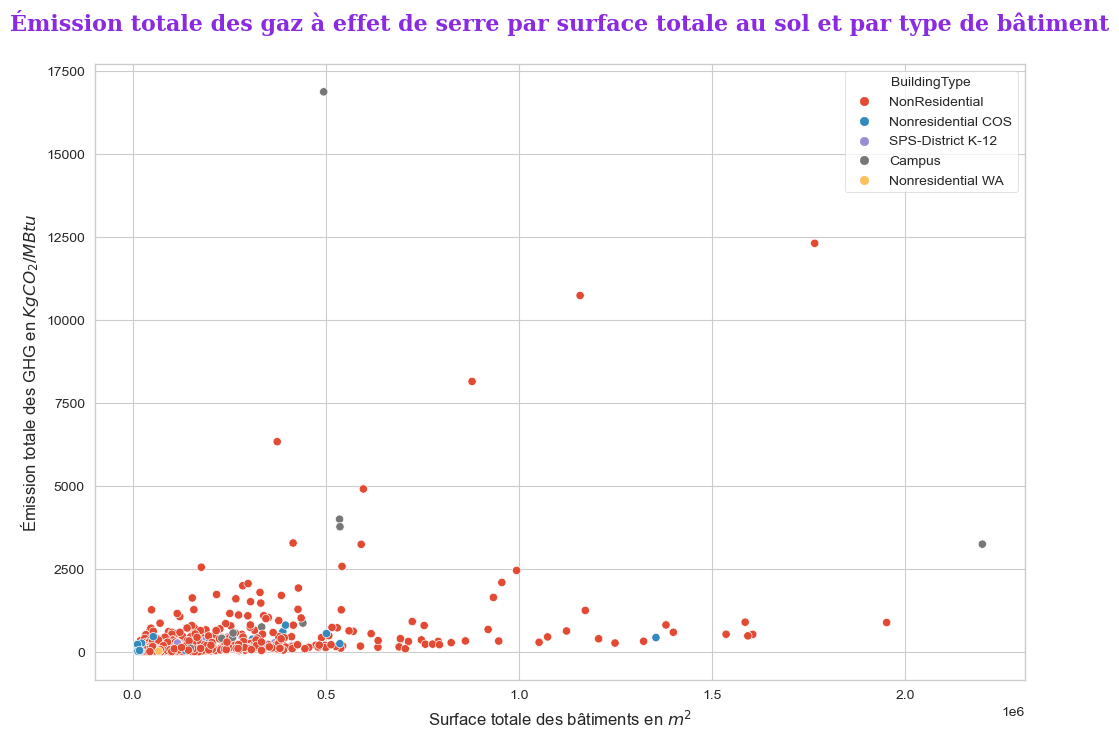

In [9]:
#figure 1 Émissions GHG
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Émission totale des gaz à effet de serre par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xlabel('Surface totale des bâtiments en $m^2$')
plt.ylabel('Émission totale des GHG en $Kg CO_2 /MBtu$')
plt.show()

Une majorité de batîments émettent moins de 2500Kg/MBtu de GHG.

Nous allons maintenant sauvegarder et copier le fichier traité pour le charger directement dans le futur.

In [10]:
data.to_csv('data_projet_4_preprocessing.csv',index=False)

In [11]:
df=data.copy()

Nous allons d'abord effectuer la modélisation sans le paramètre Energy Star Score :

In [12]:
energy_star_score=df['ENERGYSTARScore']

Supprimons également les paramètres d'identification qui nous seront pas utiles pour la modélisation :

In [13]:
df=df.drop(["ENERGYSTARScore","YearsENERGYSTARCertified","SiteEnergyUse(kBtu)"],axis=1)
unused_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode','State','City','TaxParcelIdentificationNumber','DataYear','CouncilDistrictCode','Latitude', 'Longitude', 'TotalUseTypeNumber','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
df_unused = df[unused_features]
df.drop(unused_features, axis=1, inplace = True)

In [14]:
df.describe().T

count           mean            std  \
NumberofBuildings                1645.0       1.101520       1.162587   
NumberofFloors                   1645.0       4.135562       6.603784   
PropertyGFATotal                 1645.0  113236.944073  192509.810573   
LargestPropertyUseTypeGFA        1645.0   93031.574468  158065.007955   
SecondLargestPropertyUseTypeGFA  1645.0   18639.767962   51007.370985   
ThirdLargestPropertyUseTypeGFA   1645.0    3184.249482   18085.592989   
TotalGHGEmissions                1645.0     180.115325     706.610968   
BuildingAge                      1645.0      53.820061      32.597773   
GFABuildingRate                  1645.0       0.938726       0.139930   
GFAParkingRate                   1645.0       0.061274       0.139930   
GFAPerBuilding                   1645.0  103605.428221  180330.465746   
GFAPerFloor                      1645.0   33691.957213   47675.650134   
harvesine_distance               1645.0       2.830180       2.214995   

                                         min           25%           50%  \
NumberofBuildings                    0.00000      1.000000      1.000000   
NumberofFloors                       0.00000      1.000000      2.000000   
PropertyGFATotal                 11285.00000  29508.000000  49299.000000   
LargestPropertyUseTypeGFA         5656.00000  25649.000000  44000.000000   
SecondLargestPropertyUseTypeGFA      0.00000      0.000000      0.000000   
ThirdLargestPropertyUseTypeGFA       0.00000      0.000000      0.000000   
TotalGHGEmissions                    0.00000     20.640000     49.980000   
BuildingAge                          1.00000     27.000000     50.000000   
GFABuildingRate                      0.10498      1.000000      1.000000   
GFAParkingRate                       0.00000      0.000000      0.000000   
GFAPerBuilding                       0.00000  27544.000000  45864.000000   
GFAPerFloor                          0.00000  13089.300000  22635.500000   
harvesine_distance                   0.02113      0.877715      2.322656   

                                           75%           max  
NumberofBuildings                     1.000000  2.700000e+01  
NumberofFloors                        4.000000  9.900000e+01  
PropertyGFATotal                 105100.000000  2.200000e+06  
LargestPropertyUseTypeGFA         92000.000000  1.719643e+06  
SecondLargestPropertyUseTypeGFA   12697.000000  6.399310e+05  
ThirdLargestPropertyUseTypeGFA        0.000000  4.597480e+05  
TotalGHGEmissions                   144.410000  1.687098e+04  
BuildingAge                          86.000000  1.160000e+02  
GFABuildingRate                       1.000000  1.000000e+00  
GFAParkingRate                        0.000000  8.950200e-01  
GFAPerBuilding                    98024.000000  2.200000e+06  
GFAPerFloor                       37740.000000  1.100000e+06  
harvesine_distance                    4.257219  8.843544e+00

<font color="#8A2BE2"><h1>2. Analyse des données GHG  </h1><a class="anchor" id="section_2"></a></font>

##  2.1. Heatmap des corrélations

<AxesSubplot:>

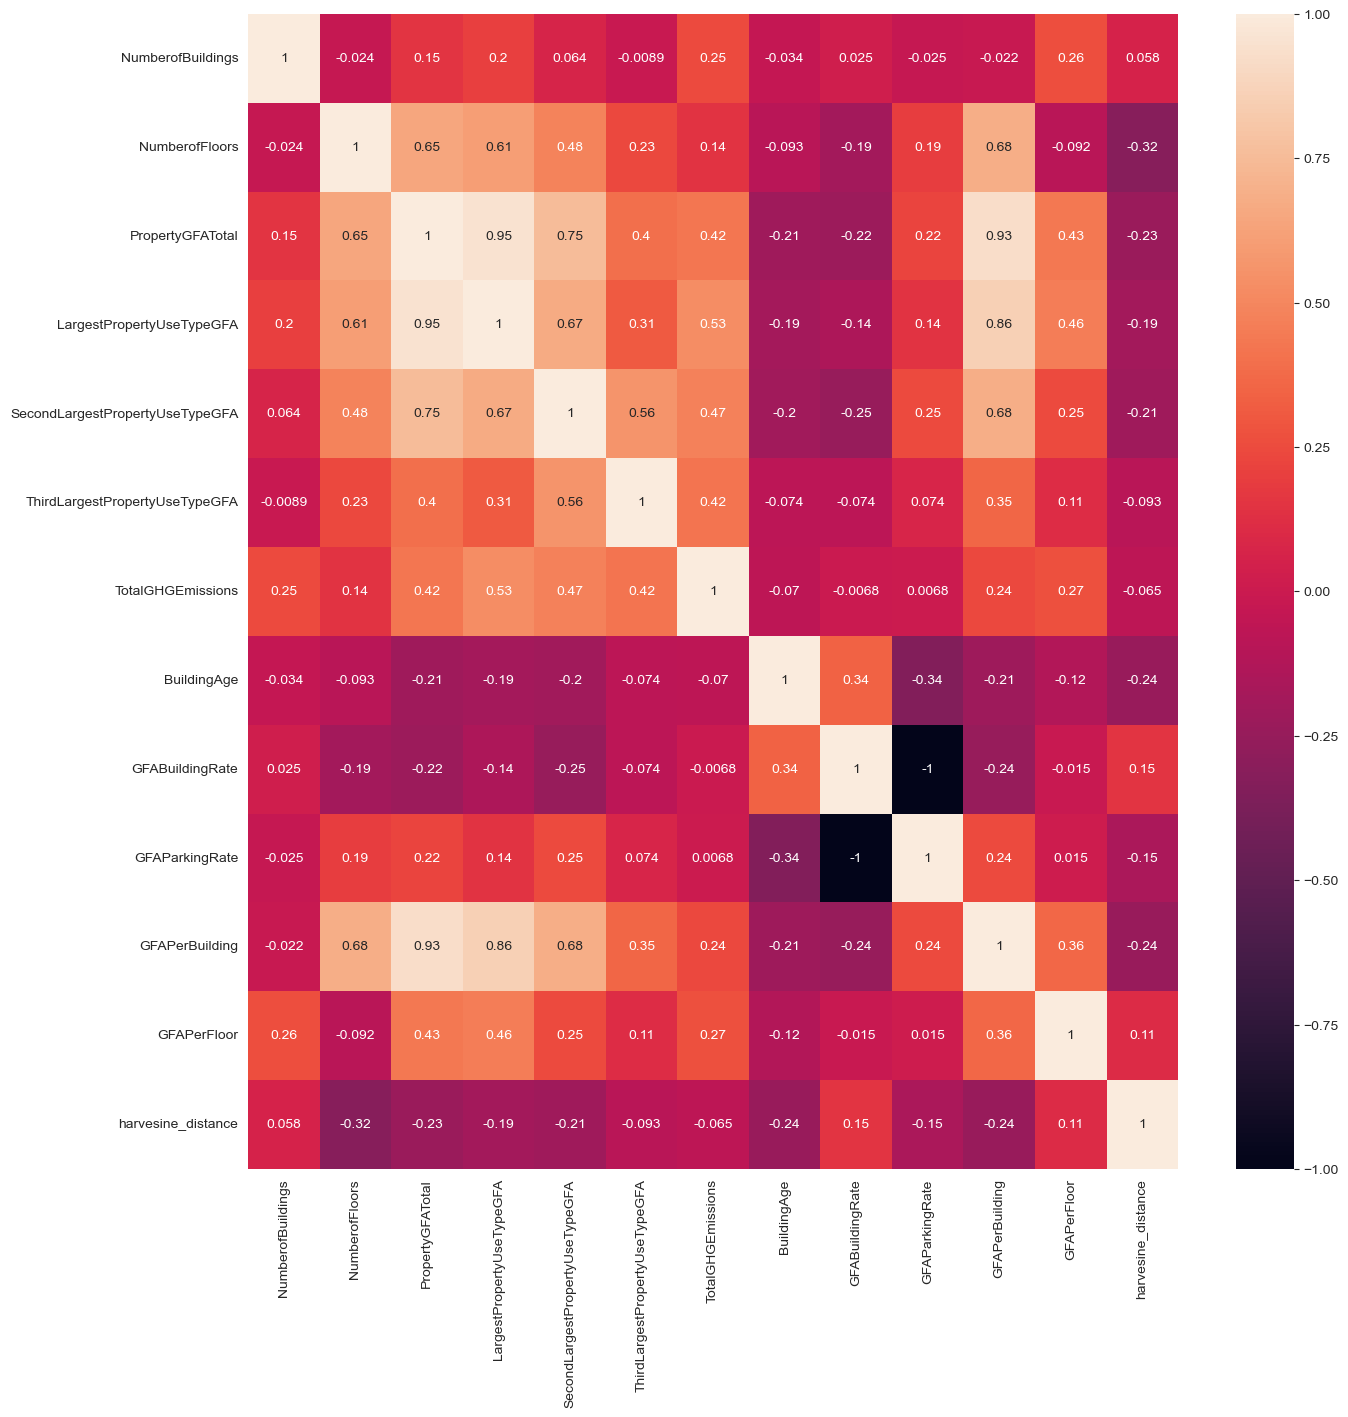

In [15]:
corr = df.corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 15))

#create seaborn heatmap
sns.heatmap(corr,annot=True)

On peut observer que la variable TotalGHGEmissions est peu corrélée ou moyennement corrélées aux autres variables. On ne peut pas conclure à ce stade du paramètre dominant sur la modélisation. 

## 2.2. Étude des Features Catégorielles

Nous allons maintenant séparer les données numériques et catégorielles : 

In [16]:
numerical_features = df.select_dtypes(include=['int64','float64'])
categorical_features = df.select_dtypes(exclude=['int64','float64']) 

Affichons le nombre de catégories : 

In [17]:
categorical_features.nunique()

BuildingType               5
PrimaryPropertyType       22
Neighborhood              13
LargestPropertyUseType    56
dtype: int64

In [18]:
#Fonction permettant de visualliser les émissions de CO2 selon les différentes catégories 

def visualisation(variable,df):
    the_mean=df["TotalGHGEmissions"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("Distribution des émissions du CO2 par {}".format(variable),size=16)
    sns.boxplot(x=variable, y="TotalGHGEmissions", data=df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel("Émissions de C02",size=14)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

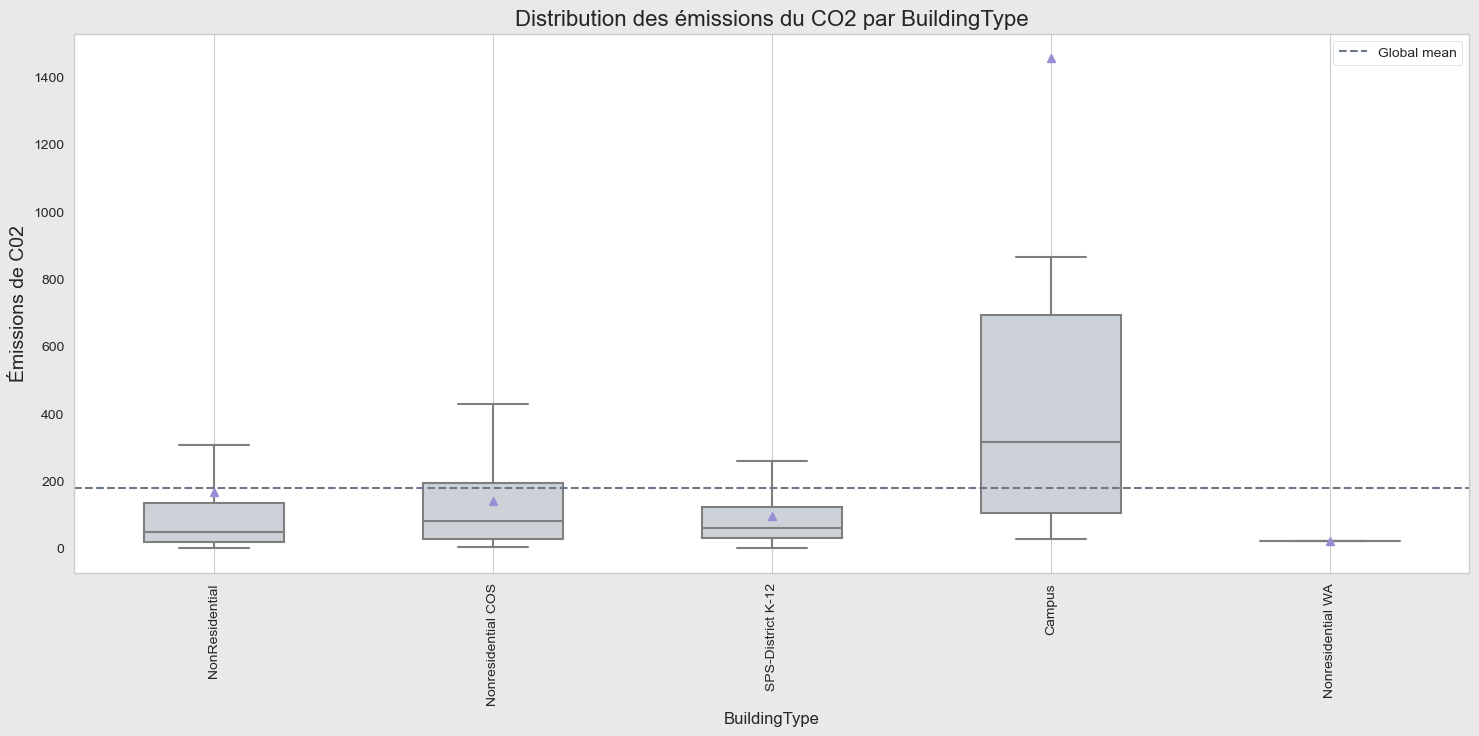

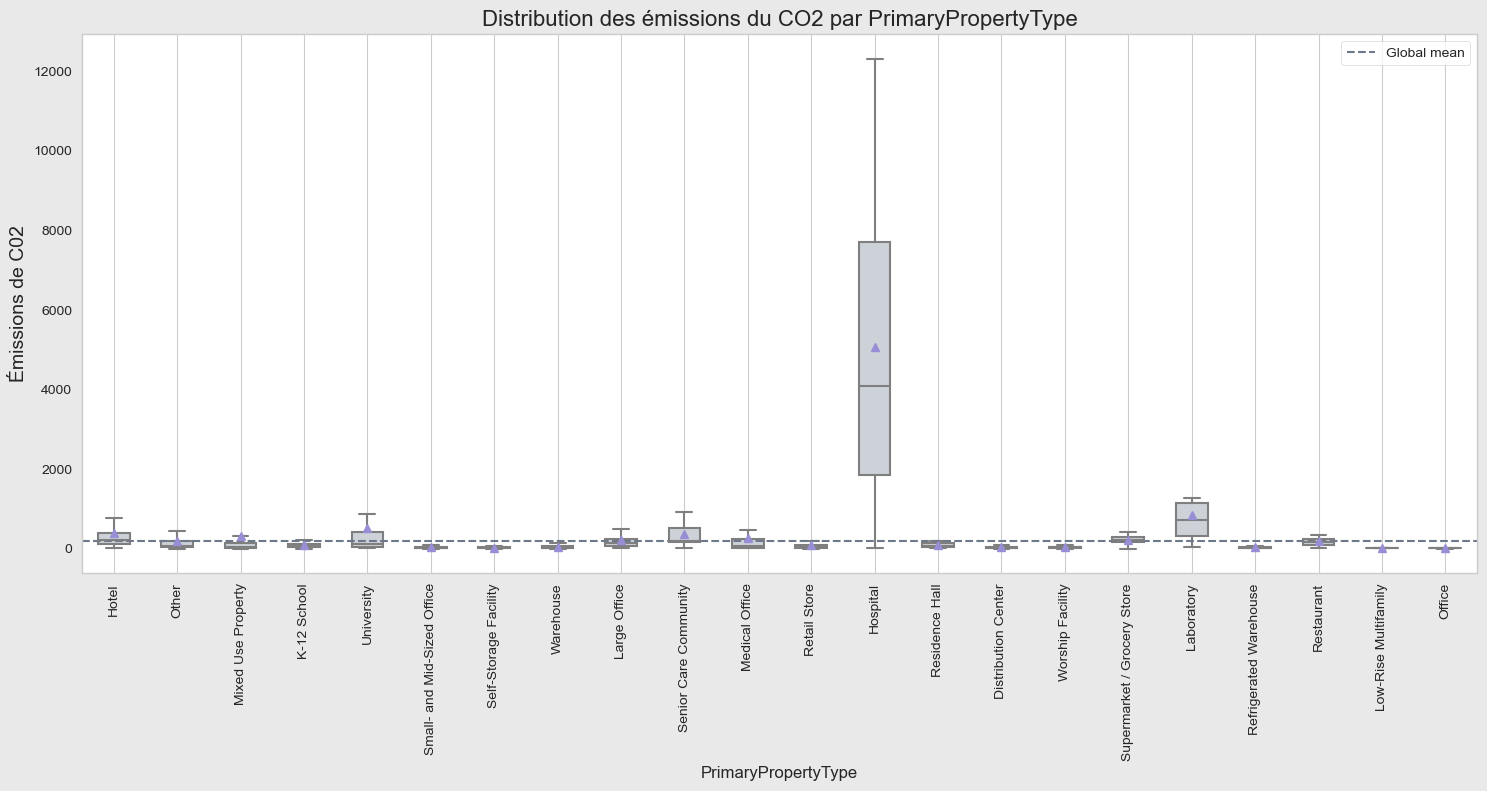

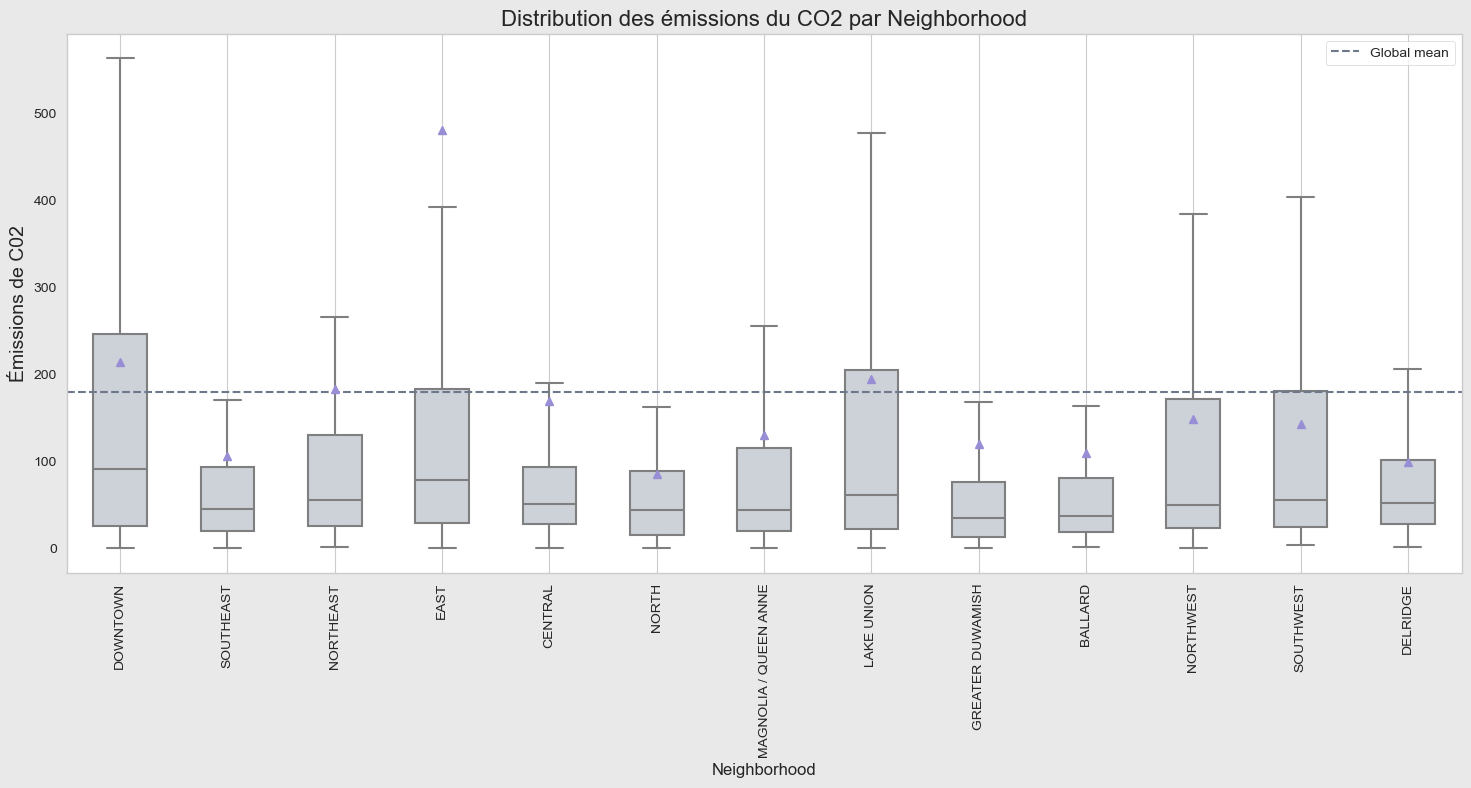

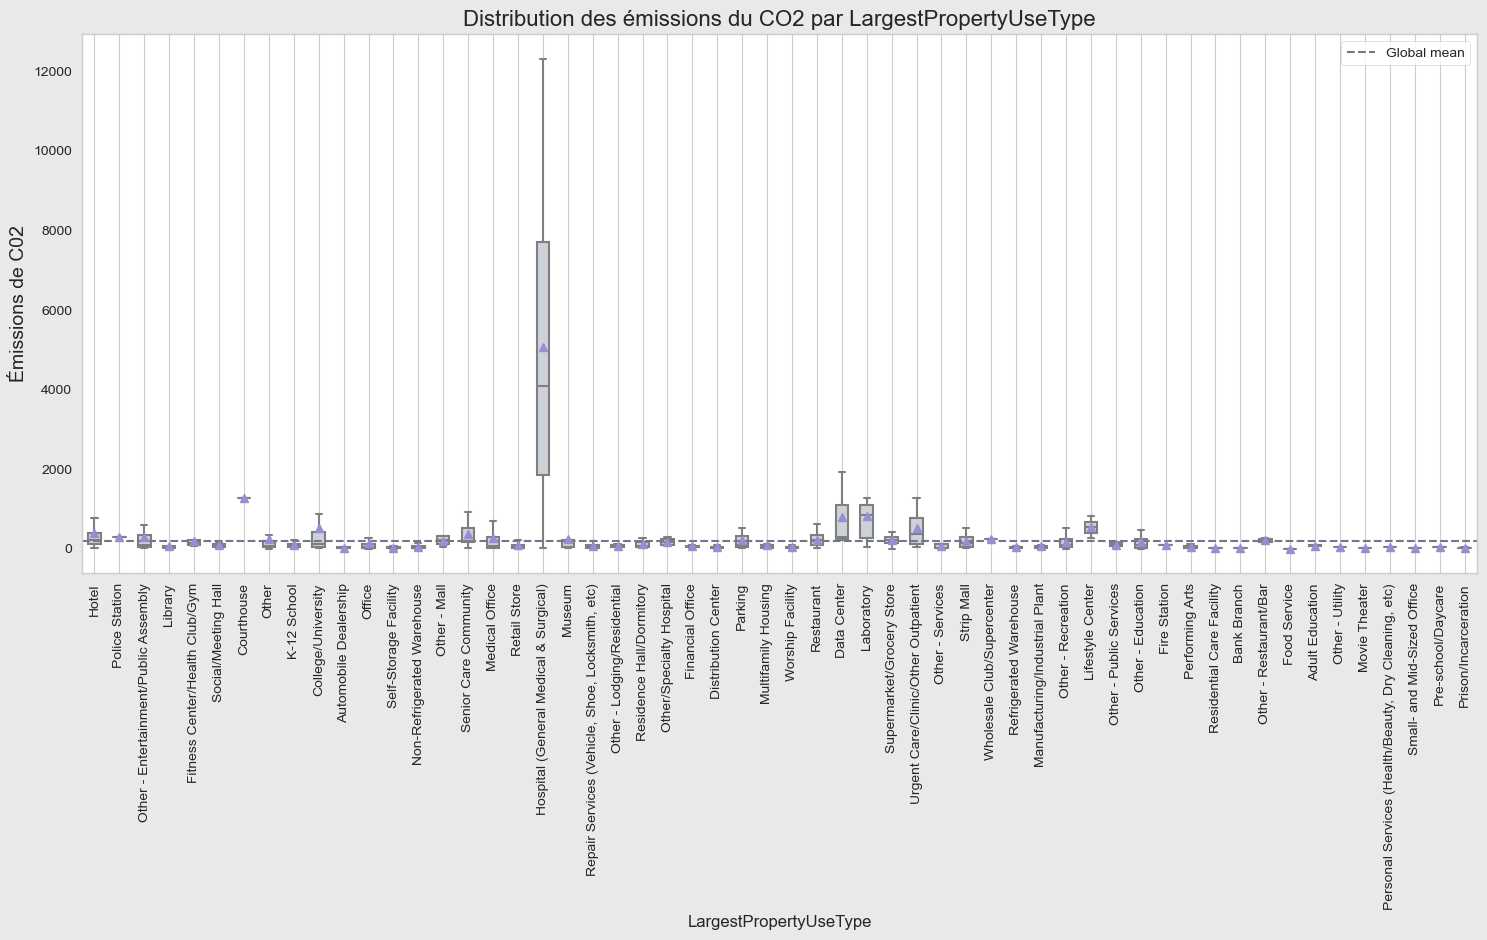

In [19]:
for v in categorical_features:
    visualisation(v,df)

**Observations**:
- *BuildingType* : Le batîment de type Campus a une émission supérieure à la moyenne générale. 
- *PrimaryPropertyType* : Il semble avoir quelques catégories de batîments qui ont une émission supérieure à la moyenne, cependant, on voit distinctement que les hopitaux ont une émission bien supérieure à ceux des autres batîments. 
- *Neighbourhood* : On ne peut pas distinguer clairement les catégories. 
- *LargestPropertyUseType* :  Il semble avoir quelques catégories de batîments qui ont une émission supérieure à la moyenne, cependant, on voit distinctement que les hopitaux ont une émission bien supérieure à ceux des autres batîments. 

# Modélisation
<font color="#8A2BE2"><h1>1. Preprocessing  </h1><a class="anchor" id="section_2_1"></a></font>


## Encodage

Afin du modéliser, il est essentiel de numériser les données catégorielles. Les variables catégorielles peuvent être divisées en deux catégories :

- Nominal : pas d'ordre particulier
- Ordinal : il y a un certain ordre entre les valeurs.

Il existe plusieurs types d'encodeurs qui sont recommandés selon le type de données. Les encodeurs utilisés dans le cadre de ce projet sont :  

1. **One-Hot Encoding (Encodage à chaud)** : Ce type d'encodage convertit les variables catégorielles en colonnes et les attribue aux éléments de chaque nouvelle colonne créée soit un 0 ou un 1. Cet encodage est valable pour les valeurs nominales et les données qui ne contiennent pas beaucoup de catégories afin d'éviter le 'curse of dimensionality'. 

2. **Ordinal Encoding (Codage Ordinal)** : Les variables codées du codage ordinal conservent la nature ordinale (ordonnée) de la variable. Cela ressemble au codage d'étiquette, la seule différence étant que le codage d'étiquette ne tient pas compte du fait qu'une variable est ordinale ou non ; il attribuera alors une suite d'entiers.

3. **Target Encoding (Codage Moyen)** : Le codage moyen permet de transformer une variable catégorielle en variable numérique en se basant sur la contribution moyenne de cette variable sur la variable cible.


### Préparation One-Hot Encoding

Nous avons fait la remarque ci-dessus que les batîments du type Campus (dans BuildingType) avaient une émission beaucoup plus élevée que les autres types de batîments non résidentiels. 

Nous pouvons ainsi avoir deux catégories pour l'encodage à chaud (cf. partie preprocessor général), les Campus et les autre types de batîments non-résidentiels : 

In [20]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [21]:
df['BuildingType'] = df['BuildingType'].replace(['NonResidential', 'Nonresidential COS','SPS-District K-12','Nonresidential WA' ], 'OtherNonResidential')

In [22]:
df['BuildingType'].unique()

array(['OtherNonResidential', 'Campus'], dtype=object)

In [23]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'BuildingAge', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance'],
      dtype='object')

### Préparation Ordinal Encoding 

Nous choissisons d'effectuer un ordinal encoding pour PrimaryPropertyType et LargestPropertyUseType, en catégorisant les batîments comme étant soit des batîments produisant une haute émission de $CO_2$, soit produisant une émission moyenne de $CO_2$, soit produisant une émission basse de $CO_2$. 

Pour ce faire, il faudra, créer ces catégories grâce à une fonction qui attribuera automatiquement les batîments dans l'une de ces catégories. Bien évidemment, dans le futur, des nouveaux types de batîments peuvent être introduits. On effectue donc l'hypothèse que les prochaines données seront préablement catégorisées selon ces 3 types. On devra également mettre à jour la moyenne utilisée pour qualifier le type d'émission au fur et à mesure qu'on obtiendra de nouvelles données. 


In [24]:
df['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other

#### Création d'une catégorisation personalisée selon la quantité de $CO_2$ émise par type de bâtiment : 

In [25]:
#Cette fonction affichera "True" si la valeur moyenne comprise dans la catégorie > x fois que la moyenne générale

def x_times_more(x,val1,global_mean):
    if val1 > x*global_mean:
        return True
    else:
        return False
#Cette fonction affichera "True" si la valeur moyenne comprise dans la catégorie < x fois que la moyenne générale
   
def x_times_less(x,val1,global_mean):
    if val1 < x*global_mean:
        return True
    else:
        return False 

In [26]:
# Cette fonction affichera la liste des catégories avec une émission élevée ou basse des émissions de CO2 avec une valeur seuil (threshold - proportion of global average)
def large_emission_track(variable, df,tresholdmax,tresholdmin):
    the_mean=df["TotalGHGEmissions"].mean()
    cat=df[variable].unique()
    high_cat=[]
    low_cat=[]
    middle_cat=[]
    for c in cat:
        x=df.loc[df[variable]==c]
        m=x["TotalGHGEmissions"].mean()
        if x_times_more(tresholdmax,m,the_mean):
            high_cat.append(c)
        elif x_times_less(tresholdmin,m,the_mean):
            low_cat.append(c)
        else :
            middle_cat.append(c)
    return high_cat, middle_cat,low_cat

Application de la fonction pour construire des listes pour l'encodage:

In [27]:
use_high,use_middle,use_low=large_emission_track('LargestPropertyUseType', df,2.5,0.4)
print("Categories with high CO2 emissions: \n",use_high)
print("Categories with medium CO2 emissions: \n",use_middle)
print("\n Categories with low CO2 emissions: \n",use_low)

Categories with high CO2 emissions: 
 ['Courthouse', 'College/University', 'Hospital (General Medical & Surgical)', 'Data Center', 'Laboratory', 'Urgent Care/Clinic/Other Outpatient', 'Lifestyle Center']
Categories with medium CO2 emissions: 
 ['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall', 'Other', 'K-12 School', 'Office', 'Other - Mall', 'Senior Care Community', 'Medical Office', 'Retail Store', 'Museum', 'Residence Hall/Dormitory', 'Other/Specialty Hospital', 'Parking', 'Multifamily Housing', 'Restaurant', 'Supermarket/Grocery Store', 'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter', 'Manufacturing/Industrial Plant', 'Other - Recreation', 'Other - Public Services', 'Other - Education', 'Fire Station', 'Other - Restaurant/Bar', 'Adult Education']

 Categories with low CO2 emissions: 
 ['Library', 'Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', 'Repair Services (

In [28]:
use_high,use_middle,use_low=large_emission_track('PrimaryPropertyType', df,2.5,0.4)
print("Categories with high CO2 emissions: \n",use_high)
print("Categories with medium CO2 emissions: \n",use_middle)
print("\n Categories with low CO2 emissions: \n",use_low)

Categories with high CO2 emissions: 
 ['University', 'Hospital', 'Laboratory']
Categories with medium CO2 emissions: 
 ['Hotel', 'Other', 'Mixed Use Property', 'K-12 School', 'Large Office', 'Senior Care Community', 'Medical Office', 'Retail Store', 'Residence Hall', 'Supermarket / Grocery Store', 'Restaurant']

 Categories with low CO2 emissions: 
 ['Small- and Mid-Sized Office', 'Self-Storage Facility', 'Warehouse', 'Distribution Center', 'Worship Facility', 'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Office']


Classification dans une nouvelle colonne nommée 'BuildingGHGEmission' qui décrit le type d'émission : 'High Emission , 'Low Emission', 'Medium Emission' : 

In [29]:
#Liste des batîments dans chaque type 

high_emission=['Courthouse', 'College/University', 'Hospital (General Medical & Surgical)',
               'Data Center', 'Laboratory', 'Urgent Care/Clinic/Other Outpatient', 'Lifestyle Center',
               'University', 'Hospital', 'Laboratory','Other','Mixed Use Property','Low-Rise Multifamily'
              ]

medium_emission=['Hotel', 'Other', 'Mixed Use Property', 'K-12 School', 'Large Office', 'Senior Care Community', 
                 'Medical Office', 'Retail Store', 'Residence Hall', 'Supermarket / Grocery Store', 'Restaurant',
                 'Hotel', 'Police Station', 'Other - Entertainment/Public Assembly', 'Fitness Center/Health Club/Gym',
                 'Social/Meeting Hall', 'Other', 'K-12 School', 'Office', 'Other - Mall', 'Senior Care Community', 
                 'Medical Office', 'Retail Store', 'Museum', 'Residence Hall/Dormitory', 'Other/Specialty Hospital', 
                 'Parking', 'Multifamily Housing', 'Restaurant', 'Supermarket/Grocery Store', 'Other - Services',
                 'Strip Mall', 'Wholesale Club/Supercenter', 'Manufacturing/Industrial Plant', 'Other - Recreation', 
                 'Other - Public Services', 'Other - Education', 'Fire Station', 'Other - Restaurant/Bar',
                 'Adult Education','Other','Mixed Use Property','Low-Rise Multifamily'
                ]
low_emission=['Small- and Mid-Sized Office', 'Self-Storage Facility', 'Warehouse', 'Distribution Center', 
              'Worship Facility', 'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Office', 'Library',
              'Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', 
              'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other - Lodging/Residential', 
              'Financial Office', 'Distribution Center', 'Worship Facility', 'Refrigerated Warehouse', 
              'Performing Arts', 'Residential Care Facility', 'Bank Branch', 'Food Service', 'Other - Utility',
              'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Small- and Mid-Sized Office', 
              'Pre-school/Daycare', 'Prison/Incarceration','Other','Mixed Use Property','Low-Rise Multifamily'
             ]

In [30]:
# liste des conditions
conditions = [
    (df['LargestPropertyUseType'].isin(high_emission)) & (df['PrimaryPropertyType'].isin(high_emission)),
    (df['LargestPropertyUseType'].isin(medium_emission)) & (df['PrimaryPropertyType'].isin(medium_emission)),
    (df['LargestPropertyUseType'].isin(low_emission)) & (df['PrimaryPropertyType'].isin(low_emission)),
    (~df['LargestPropertyUseType'].isin(high_emission)) & (~df['PrimaryPropertyType'].isin(high_emission) &
    ~df['LargestPropertyUseType'].isin(medium_emission)) & (~df['PrimaryPropertyType'].isin(medium_emission) &  
    ~df['LargestPropertyUseType'].isin(low_emission)) & (~df['PrimaryPropertyType'].isin(low_emission)
    )
    ]

# liste des valeurs attribuées à chacune des conditions
values = ['High Emission', 'Medium Emission', 'Low Emission','Unknown Emission']

# création de la nouvelle colonne
df['BuildingGHGEmission'] = np.select(conditions, values)

# affichage
df.head()

BuildingType PrimaryPropertyType Neighborhood  NumberofBuildings  \
0  OtherNonResidential               Hotel     DOWNTOWN                1.0   
1  OtherNonResidential               Hotel     DOWNTOWN                1.0   
2  OtherNonResidential               Hotel     DOWNTOWN                1.0   
3  OtherNonResidential               Hotel     DOWNTOWN                1.0   
4  OtherNonResidential               Hotel     DOWNTOWN                1.0   

   NumberofFloors  PropertyGFATotal LargestPropertyUseType  \
0              12             88434                  Hotel   
1              11            103566                  Hotel   
2              41            956110                  Hotel   
3              10             61320                  Hotel   
4              18            175580                  Hotel   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    88434.0                              0.0   
1                    83880.0                          15064.0   
2                   756493.0                              0.0   
3                    61320.0                              0.0   
4                   123445.0                          68009.0   

   ThirdLargestPropertyUseTypeGFA  TotalGHGEmissions  BuildingAge  \
0                             0.0             249.98           89   
1                          4622.0             295.86           20   
2                             0.0            2089.28           47   
3                             0.0             286.43           90   
4                             0.0             505.01           36   

   GFABuildingRate  GFAParkingRate  GFAPerBuilding  GFAPerFloor  \
0          1.00000         0.00000         88434.0     7369.500   
1          0.85455         0.14545        103566.0     9415.091   
2          0.79425         0.20575        956110.0    23319.756   
3          1.00000         0.00000         61320.0     6132.000   
4          0.64688         0.35312        175580.0     9754.444   

   harvesine_distance BuildingGHGEmission  
0            0.496782     Medium Emission  
1            0.488726     Medium Emission  
2            0.602378     Medium Emission  
3            0.586253     Medium Emission  
4            0.650801     Medium Emission

In [31]:
df['BuildingGHGEmission'].unique()

array(['Medium Emission', 'Low Emission', 'High Emission'], dtype=object)

In [32]:
#Effacer les colonnes LargestPropertyUseType et PrimaryPropertyType
unused_features_2 = ['LargestPropertyUseType', 'PrimaryPropertyType']
df_unused_2 = df[unused_features_2]
df.drop(unused_features_2, axis=1, inplace = True)

In [33]:
df.columns

Index(['BuildingType', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'BuildingAge', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance',
       'BuildingGHGEmission'],
      dtype='object')

## 2.2. Preprocessor Général 

Cette étape consiste à encoder les données catégorielles et à standardiser les données numériques avant de passer à la modélisation. 


In [34]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer,OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

#One-Hot Encoding
one_hot_features=['BuildingType']
one_hot_transformer= OneHotEncoder()

#Target Encoding
target_features = ['Neighborhood']
target_transformer = TargetEncoder()

#Label Encoding
ord_features=['BuildingGHGEmission']
ord_transformer=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

#Numerical Transformer
numeric_features = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
       'GFABuildingRate', 'GFAParkingRate', 'GFAPerBuilding', 'GFAPerFloor',
       'harvesine_distance']

numeric_transformer = RobustScaler(unit_variance=True)



#General preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('one_hot',one_hot_transformer,one_hot_features),
        ('target', target_transformer, target_features),
        ('ord', ord_transformer, ord_features)
    ]
)



##  Training and Testing Dataset

Nous devons préparer maintenant les données pour l'entrainement et la prédiction : 

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(['TotalGHGEmissions'], axis=1)
Y = df.TotalGHGEmissions
Y=Y+10**-12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50,shuffle=True)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

# Shuffle et stratified pour s'assurer d'avoir les mêmes catégories. 
# Distribution des données

Entrainement: 1233 lignes,
Test: 412 lignes.



#### Visualisation du Training et Testing dataset

In [36]:
# BAR PLOT
# Fonction qui créer des barplots pour chaque catégorie

def bar_perc(data, z,x,y):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (x, y))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.5                   # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

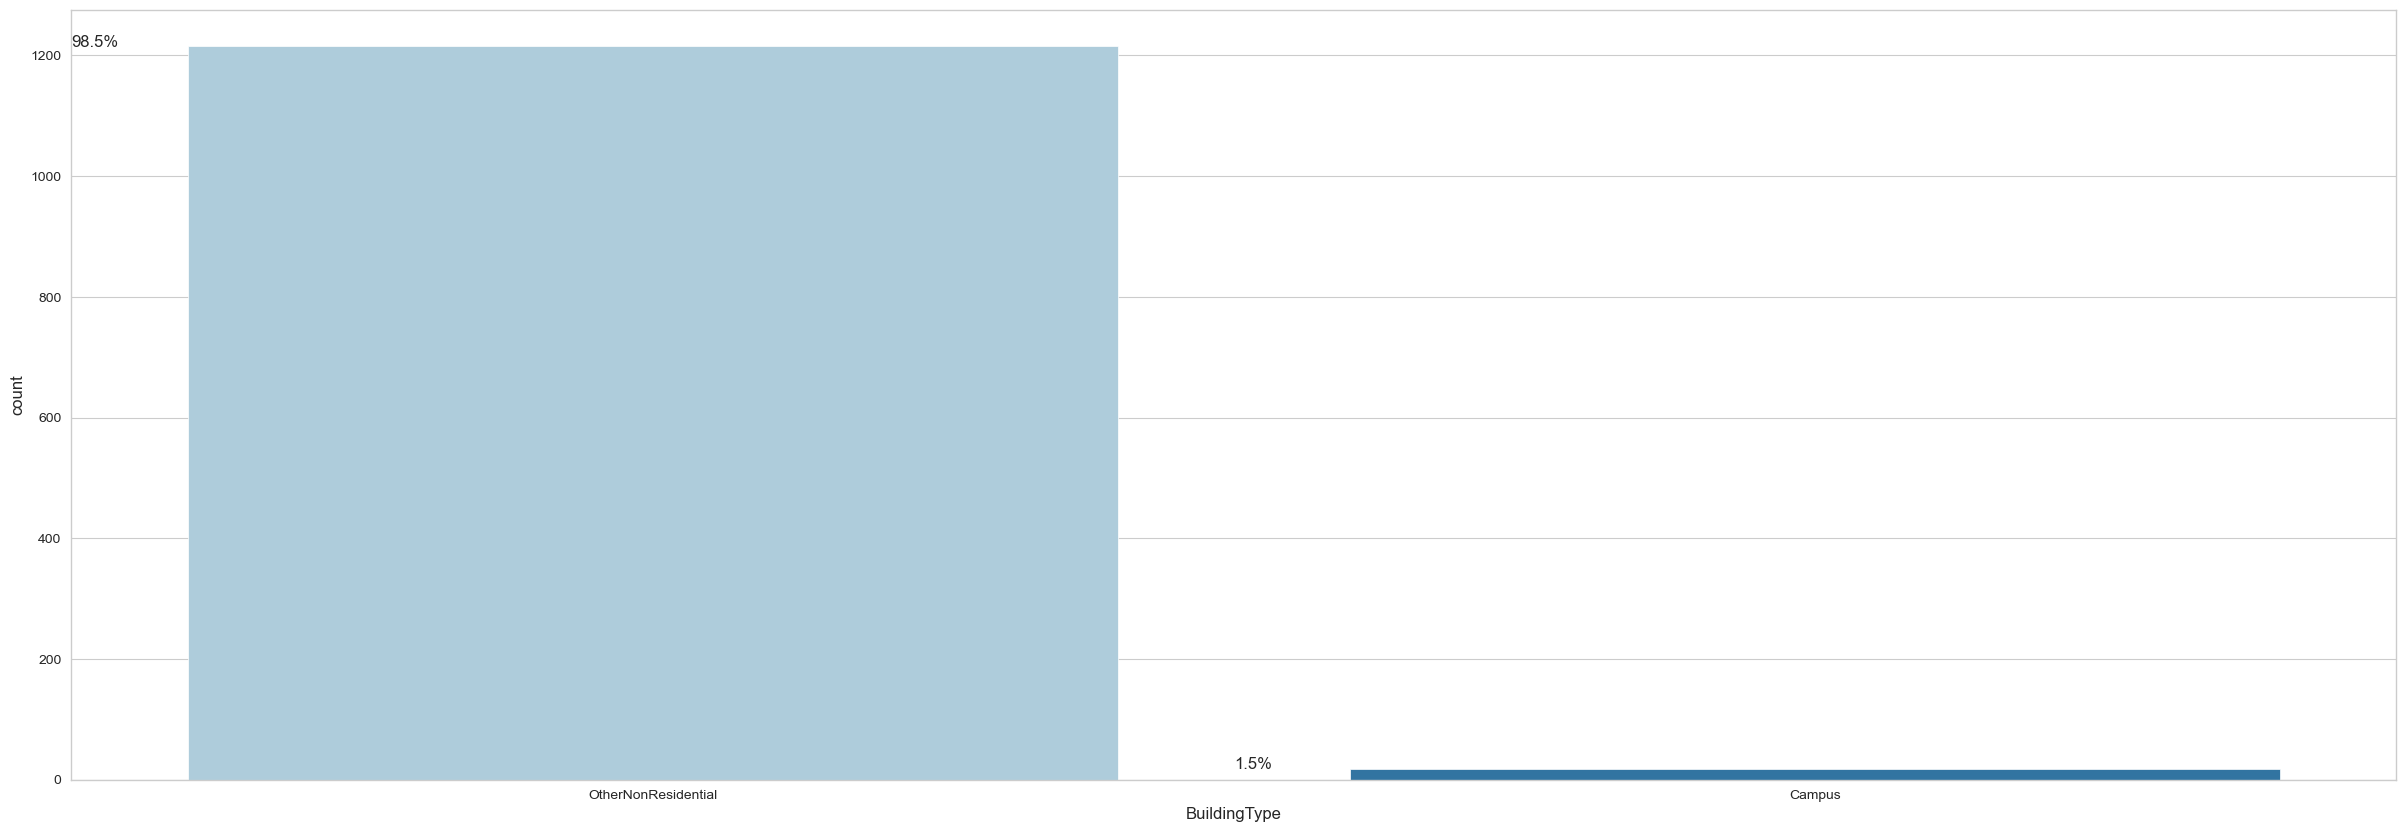

In [37]:
bar_perc(X_train, 'BuildingType',30,10)

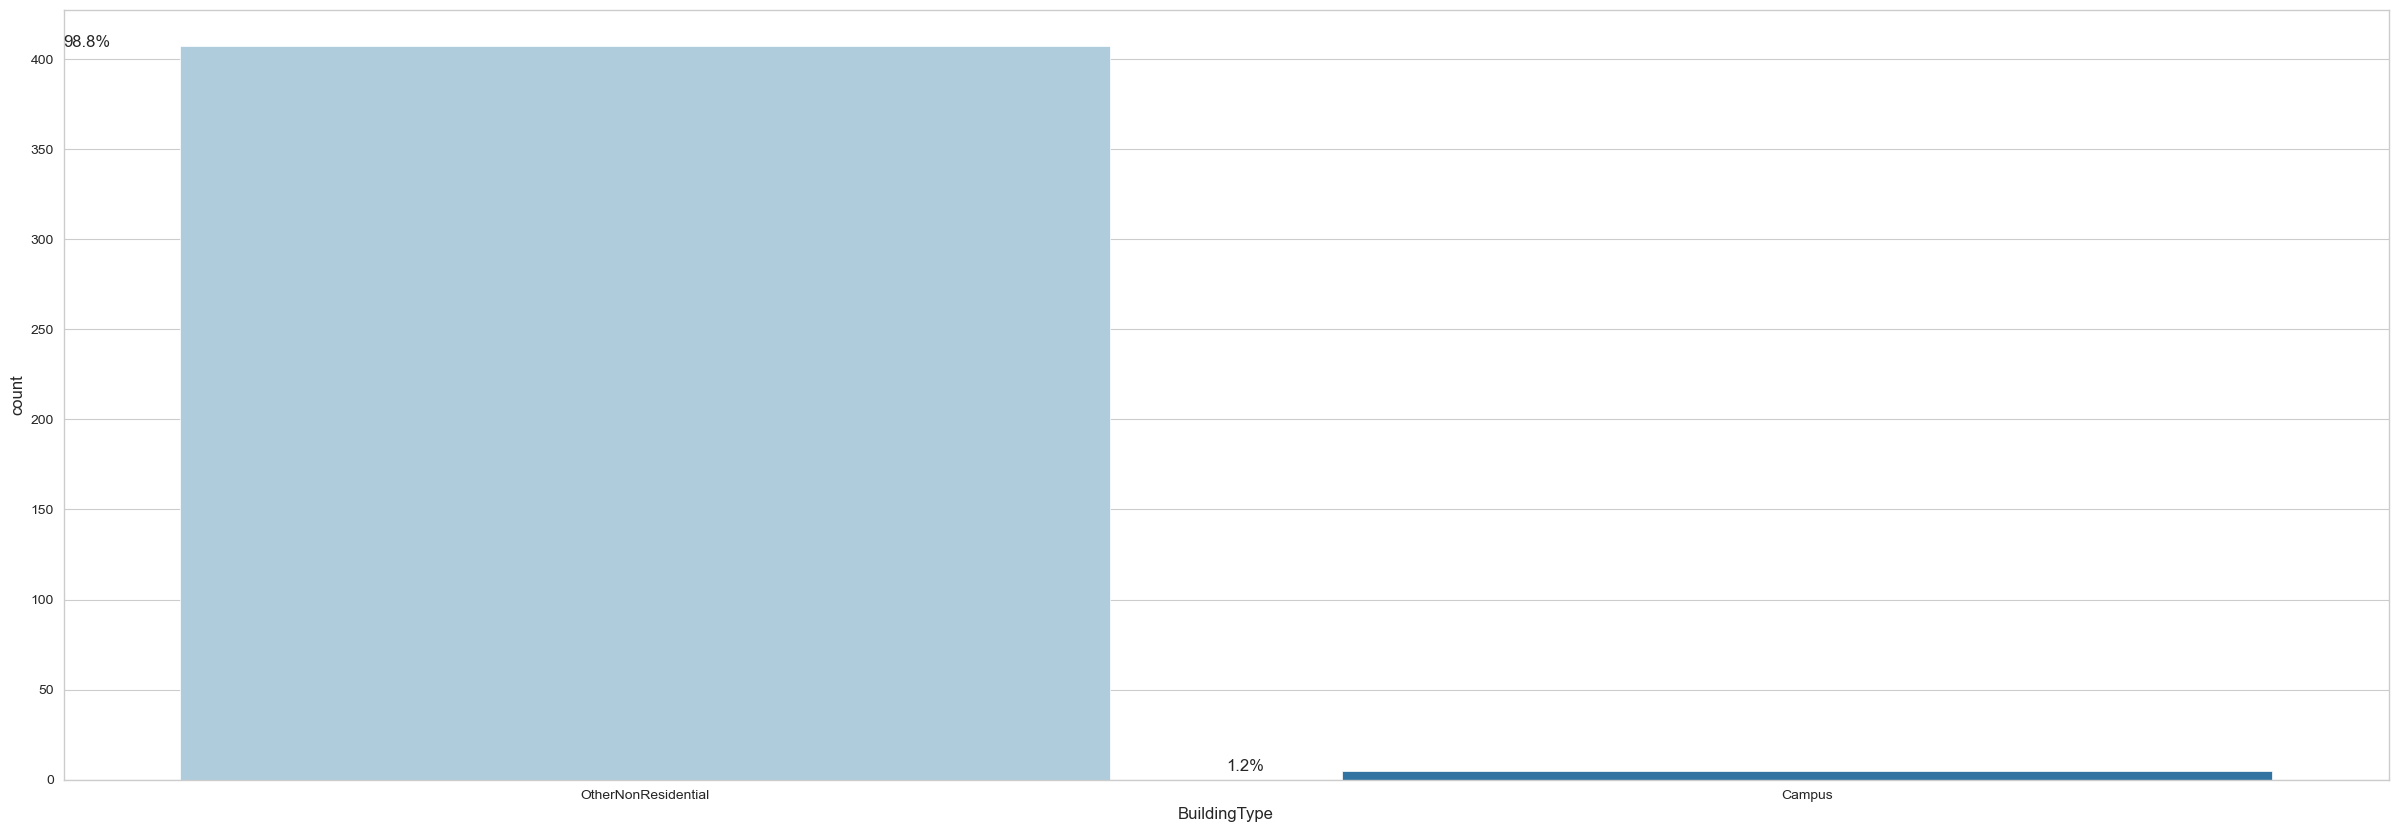

In [38]:
bar_perc(X_test, 'BuildingType',30,10)

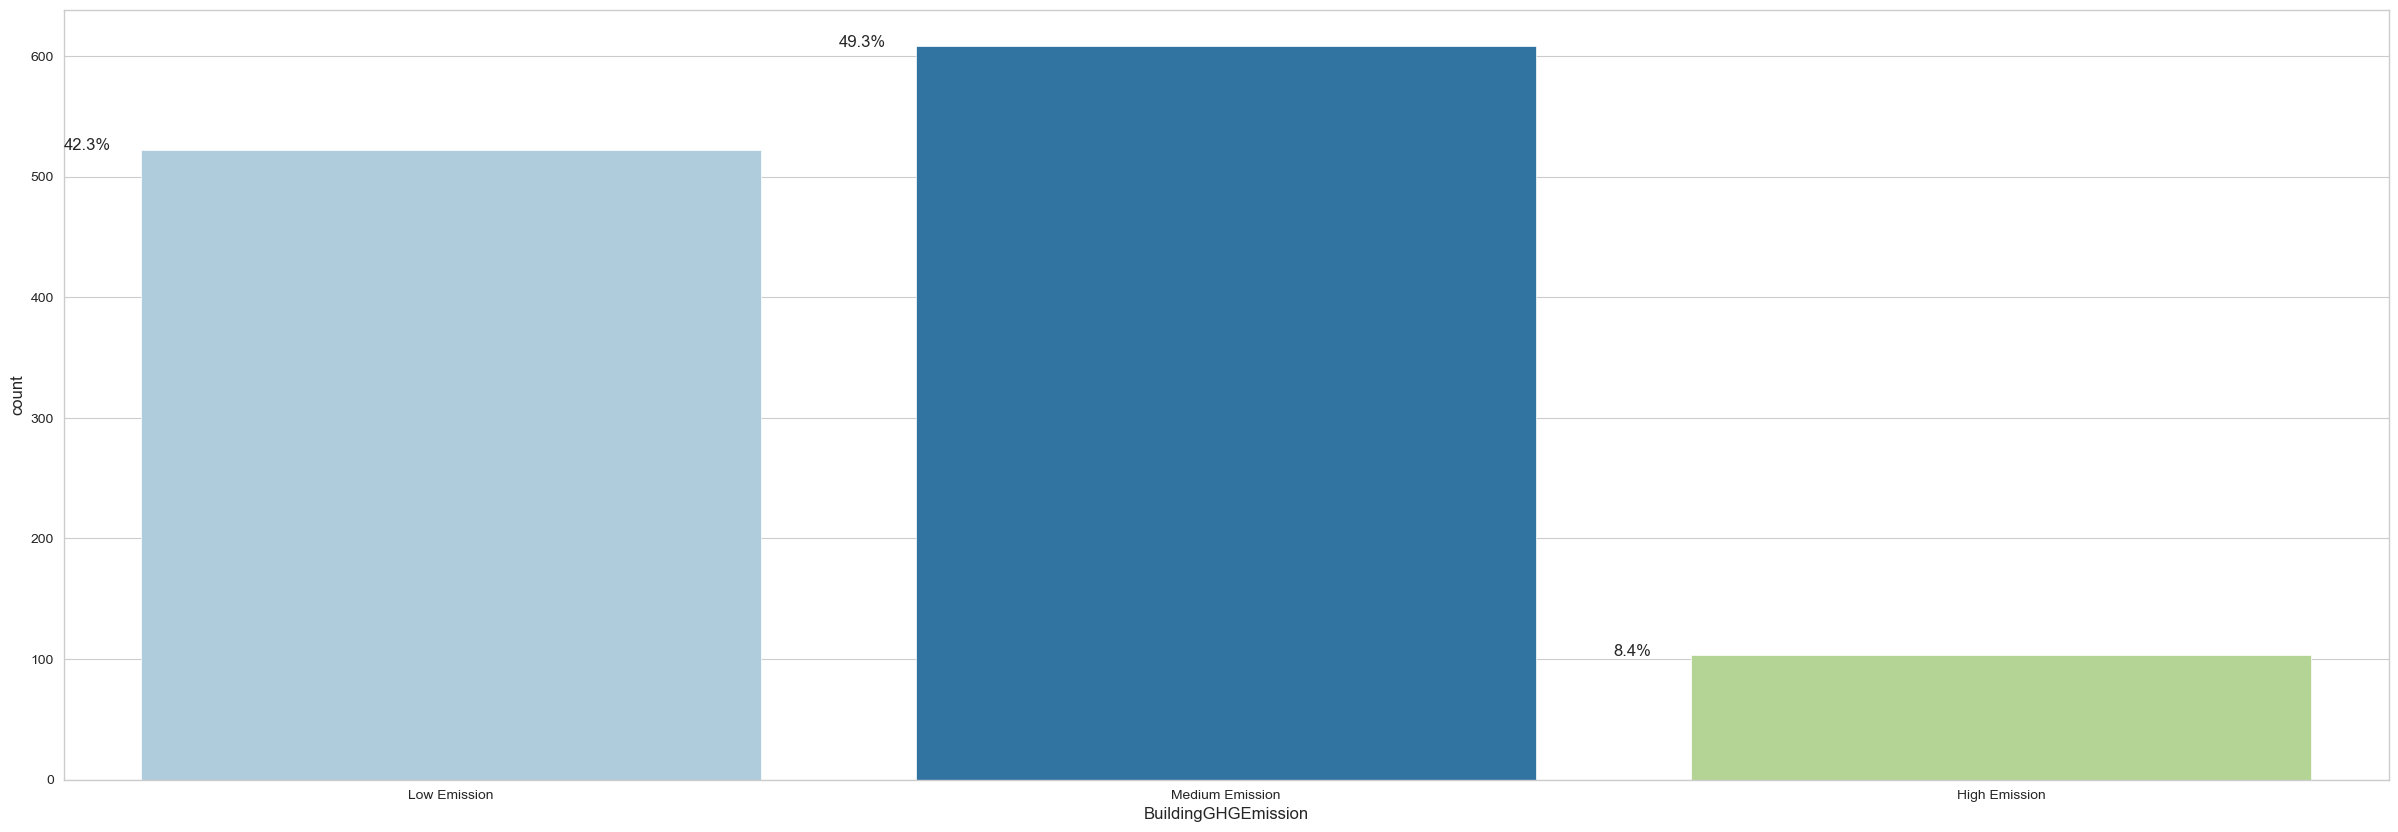

In [39]:
bar_perc(X_train, 'BuildingGHGEmission',30,10)

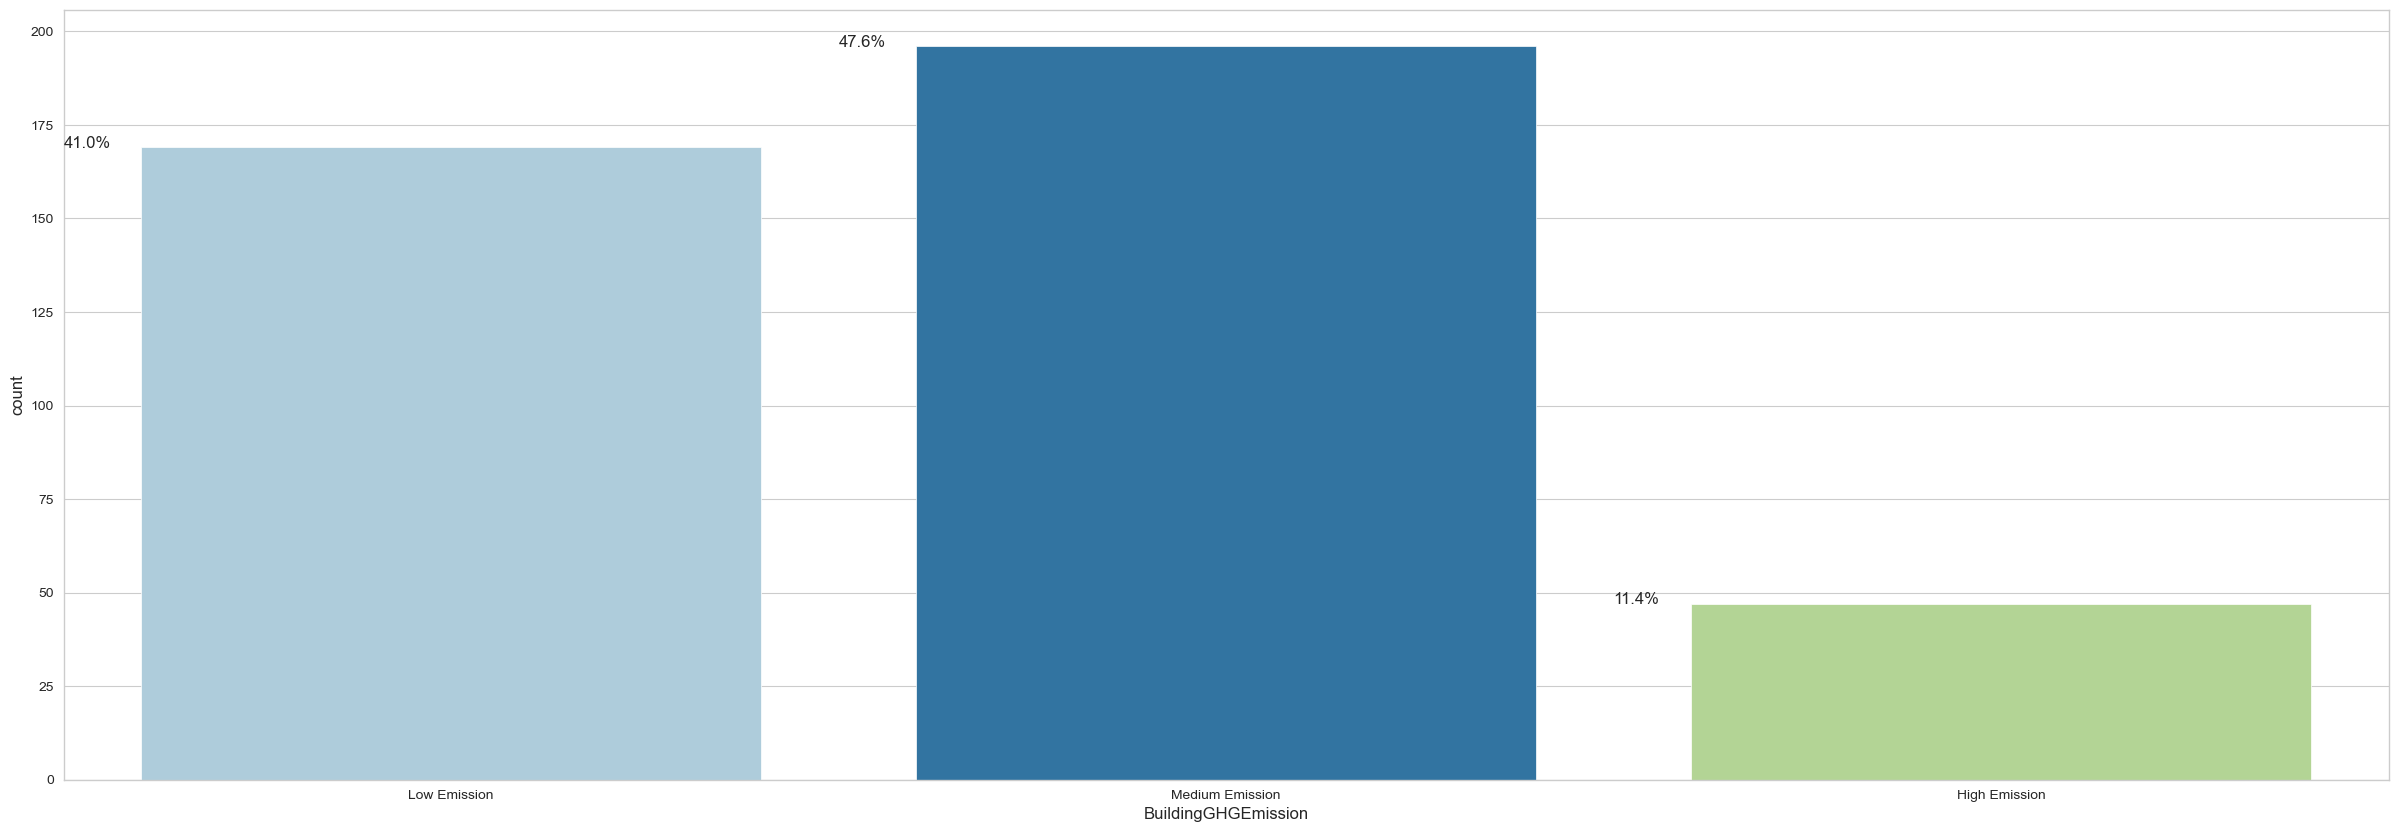

In [40]:
bar_perc(X_test, 'BuildingGHGEmission',30,10)

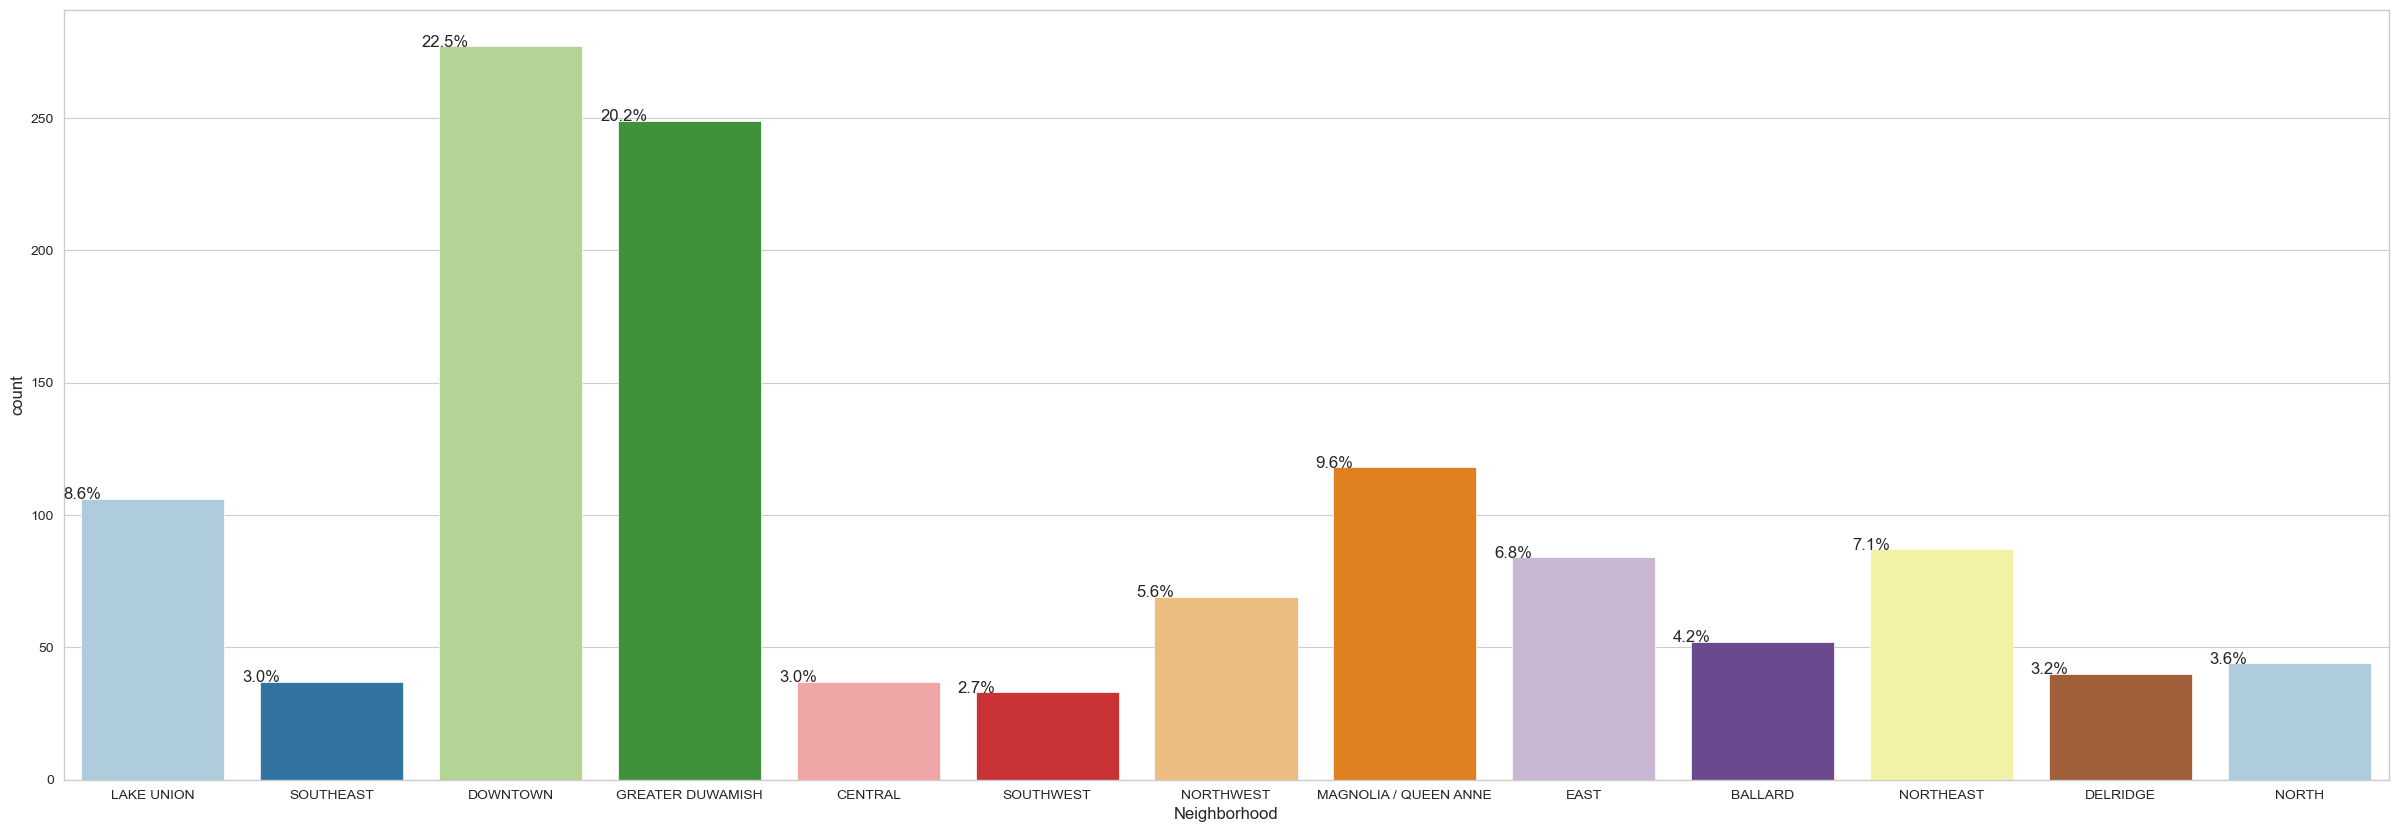

In [41]:
bar_perc(X_train, 'Neighborhood',30,10)

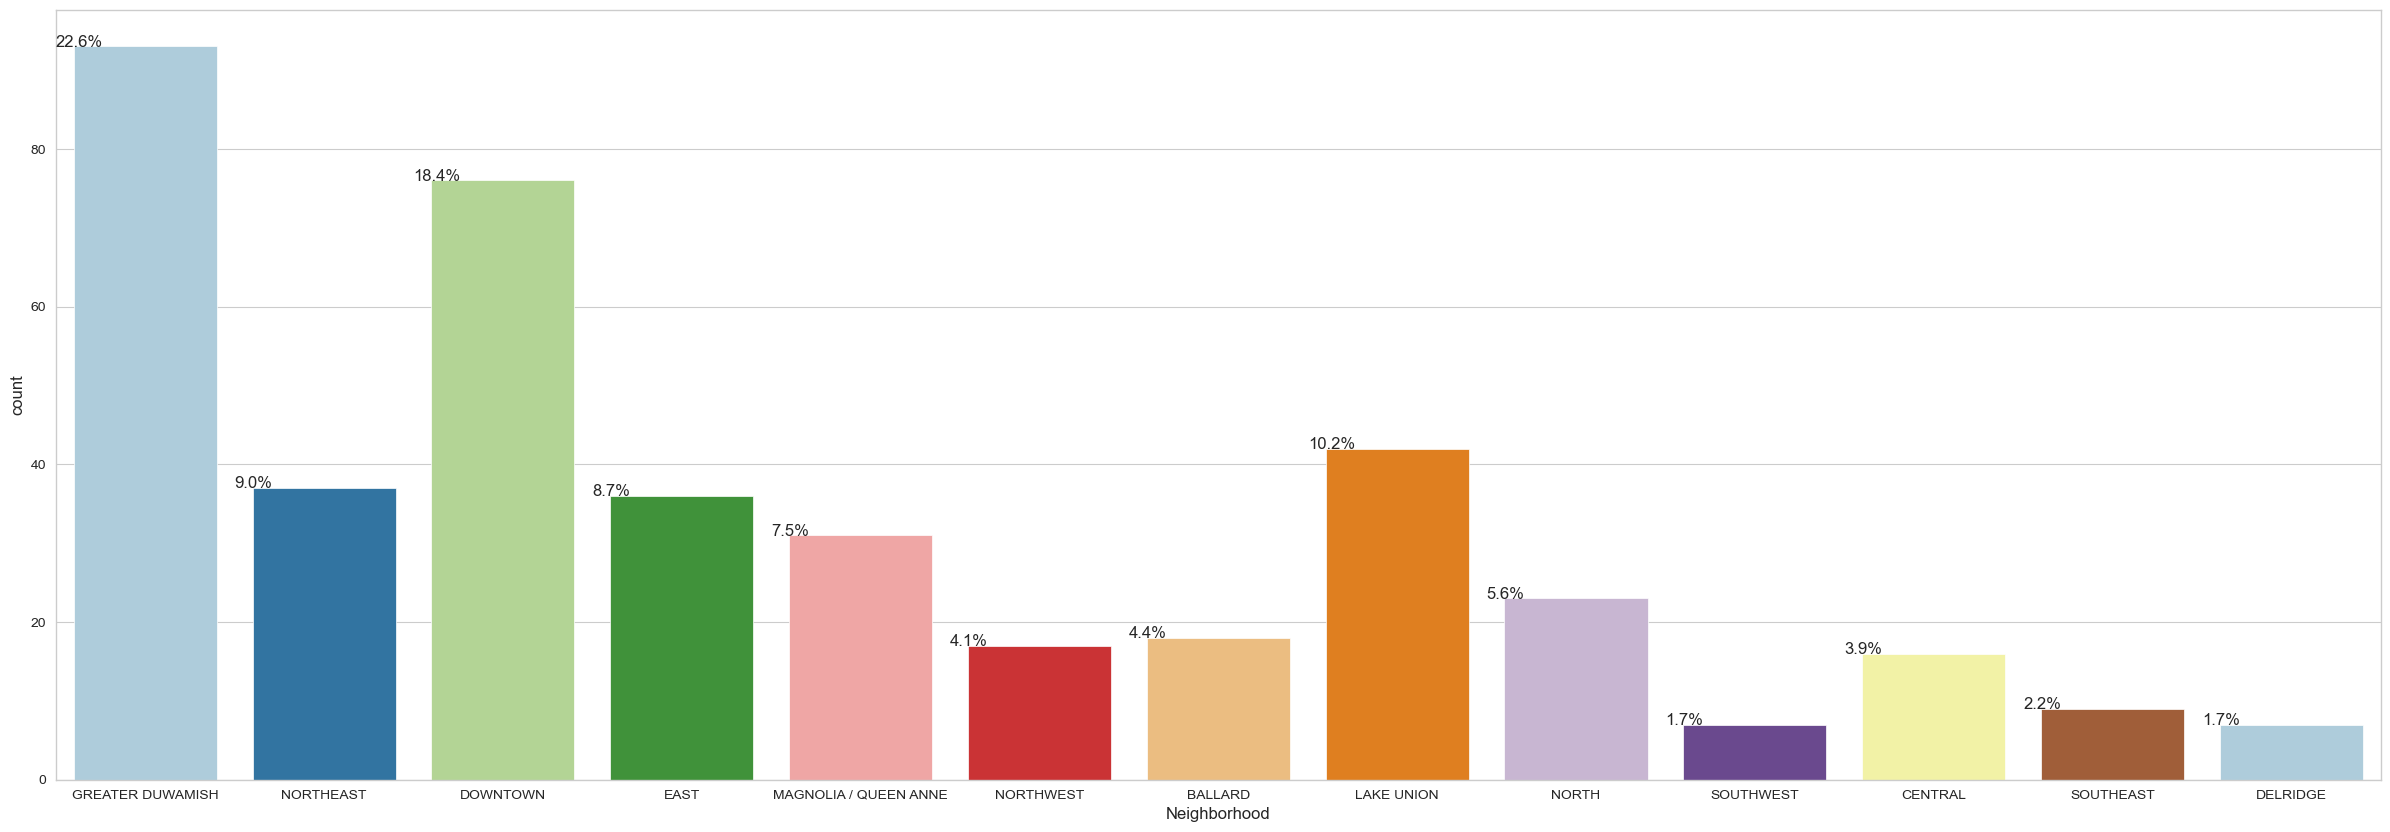

In [42]:
bar_perc(X_test, 'Neighborhood',30,10)

## 2.3. Étude échelle Log

Avant de modéliser, nous allons étudier si les données montrent plus de variations en échelle log : 

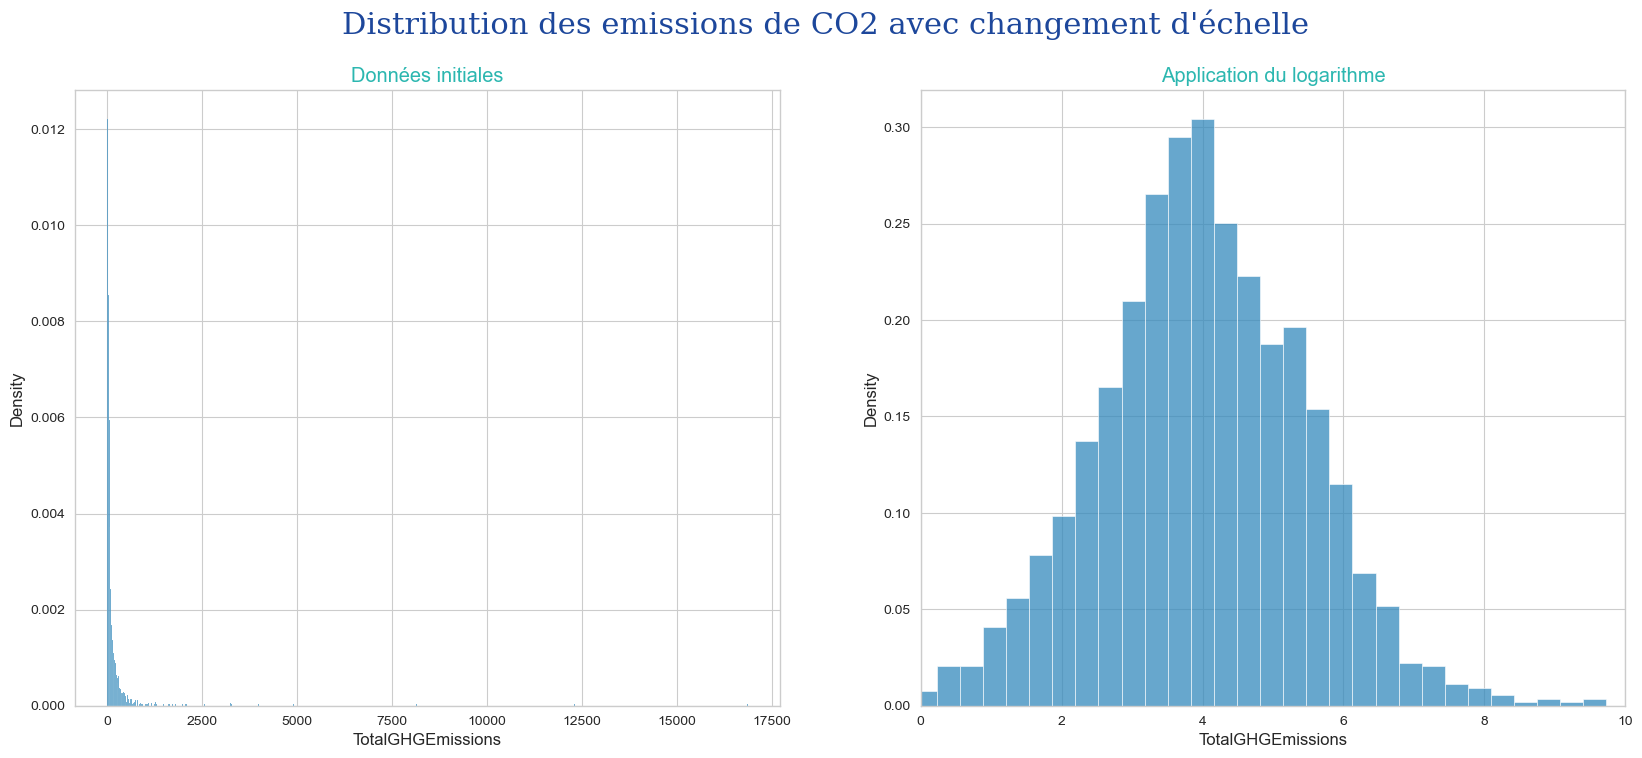

In [43]:

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'fontsize': 18,
             }

from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
y=df[['TotalGHGEmissions']]
y=y+10**-12
y_log = logtransformer.transform(y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=y, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=y_log, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
axes[1].set_xlim(0,10)
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

On constate sur le graphique que l'application de l'échelle log sur la variable cible permet de mieux distinguer chaque point. Nous allons donc prendre en compte cela lors de la modélisation : 

## Linear Regression Model 

In [44]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]
            }
# Recherche des meilleurs paramètres avec GridsearchCV
mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [45]:
#Entrainement sur les 2 variables à expliquer :
GHG_mlr_model = mlr_grid_cv.fit(X_train, Y_train)

Voici le chemin effectué :

In [46]:
GHG_mlr_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_dis...
                                                  ['BuildingGHGEmission'])])),
                ('grid_search_mlr',
                 GridSearchCV(cv=5,
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()),
                              n_jobs=-1,
                              param_grid={'regressor__fit_intercept': [True,
                                                                       False],
                                          'regressor__normalize': [True,
                                                                   False]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

##  Meilleur Modèle

In [47]:
lm=GHG_mlr_model.named_steps['grid_search_mlr'].best_params_
lm

{'regressor__fit_intercept': True, 'regressor__normalize': True}

In [48]:
linear_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearRegression(fit_intercept=True,normalize= True))])

## Évaluation du modèle 

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step,model,X_train,Y_train,X_test,Y_test):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    model.fit(X_train, Y_train)
    y_true = Y_test
    y_pred = model.predict(X_test)
    
    best_MAE = mean_absolute_error(y_true, y_pred) #accuracy_score(y_true, y_pred)
    best_r2 =  r2_score(y_true, y_pred)
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score de MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_MAE,3), round(best_r2,3), best_params, training_time))
    return df_results

In [50]:
GHG_mlr_results = model_scores(GHG_mlr_model, 'grid_search_mlr',linear_model,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 209.175
Meilleur Score R2 : 0.488
Meilleurs paramètres : {'regressor__fit_intercept': True, 'regressor__normalize': True}
Temps moyen d'entrainement : 24.42s


Ce modèle présente un **Mean Absolute Error (MAE)= 209.75** et un **$R^2 = 0.488$** avec un **temps d'entraîment de 24.42s.**

### Prediction Error Plot

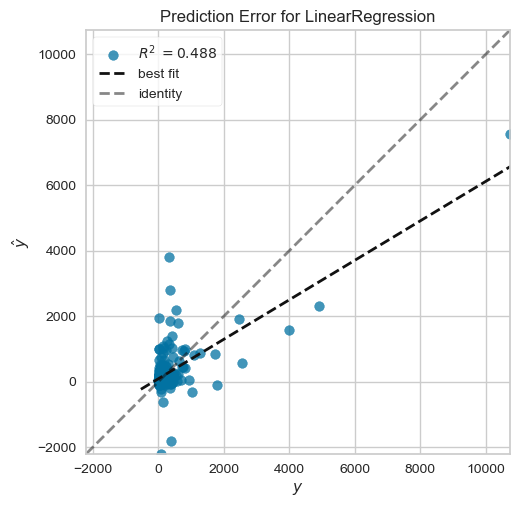

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [51]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = linear_model
visualizer = PredictionError(model)
model.fit(X_train, Y_train)
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

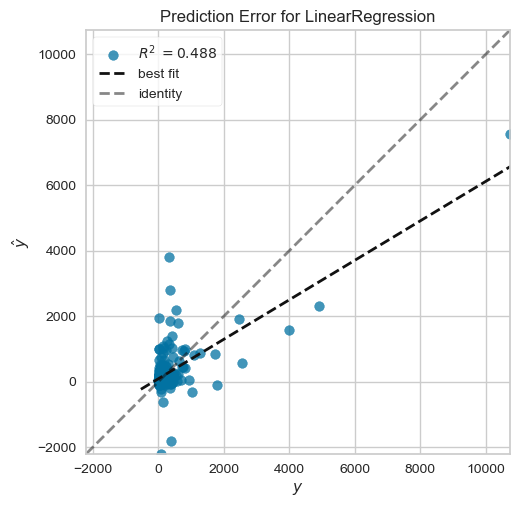

In [52]:
from yellowbrick.regressor import prediction_error
# Instantiate the linear model and visualizer
model = linear_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

### Residual Plot

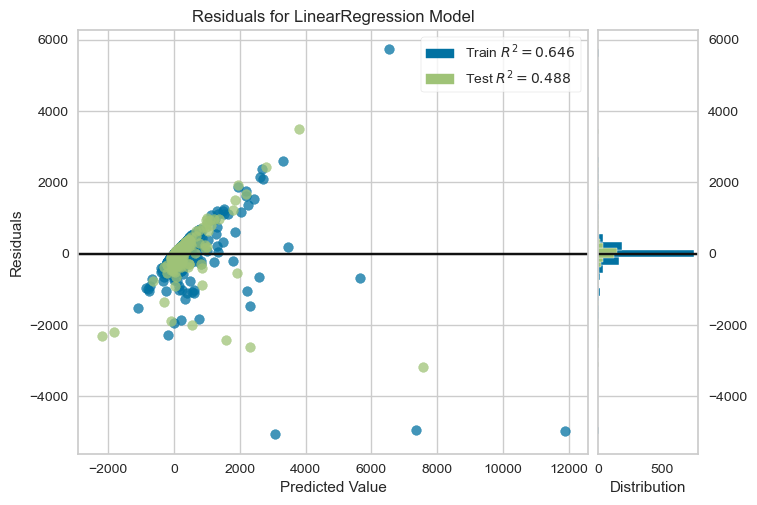

In [53]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

Les résidus semblent être normalement distribués autour de 0, satisfaisant les conditions de linéarité et de normalité. Cependant, ils sont légèrement positifs pour les valeurs prédites plus élevées et semblent également augmenter en amplitude à mesure que la valeur prédite augmente, ce qui suggère une violation de la condition d'homoscédasticité.

Compte tenu de ces informations, nous pourrions envisager l'une des options suivantes : (1) utiliser une régression linéaire de toute façon, (2) utiliser une régression linéaire après avoir supprimé les valeurs aberrantes, ce qui déjà effectué ou bien (3) recourir à d'autres modèles de régression.

### Cook's Distance (General Linear Models)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_distance']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['BuildingType']),
                                                 ('target', TargetEncoder(),
                                                  ['Neighborhood']),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BuildingGHGEmission'])])),
                ('model', CooksDistance(ax=<AxesSubplot:>))])

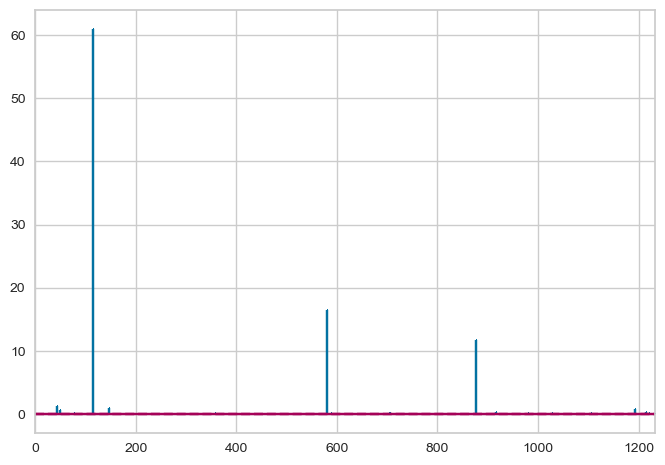

In [54]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete



# Instantiate and fit the visualizer
cooks_distance= Pipeline([("preprocessor", preprocessor), 
                     ("model", CooksDistance())])
visualizer = cooks_distance
visualizer.fit(X_train, Y_train)
visualizer               # Finalize and render the figure

La présence d'un si grand nombre de points hautement influents suggère que la régression linéaire peut ne pas convenir à cet ensemble de données. Une ou plusieurs des quatre hypothèses derrière la régression linéaire pourraient être violées ; à savoir l'un des éléments suivants : indépendance des observations, linéarité de la réponse, normalité des résidus ou homogénéité de la variance ("homoscédasticité"). Nous pouvons vérifier ces trois dernières conditions à l'aide d'un diagramme des résidus comme illustré ci-dessus. 

# Modèle ElasticNet

In [55]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [56]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train)

In [57]:
GHG_eNet_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_dis...
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=ElasticNet()),
                              n_jobs=-1,
                              param_grid={'regressor__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                                          'regressor__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                          'regressor__max_iter': [10, 100,
                                                                  1000]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

## Meilleur modèle

In [58]:
eNet=GHG_eNet_model.named_steps['grid_search_enet'].best_params_
eNet

{'regressor__alpha': 1.0,
 'regressor__l1_ratio': 0.4,
 'regressor__max_iter': 10}

In [59]:
eNet_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", ElasticNet(alpha=1.0,l1_ratio=0.4,max_iter=10))])

## Évaluation du modèle

In [60]:
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet',eNet_model,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 186.472
Meilleur Score R2 : 0.507
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.4, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 9.86s


### Prediction Error Plot et Residual Plot

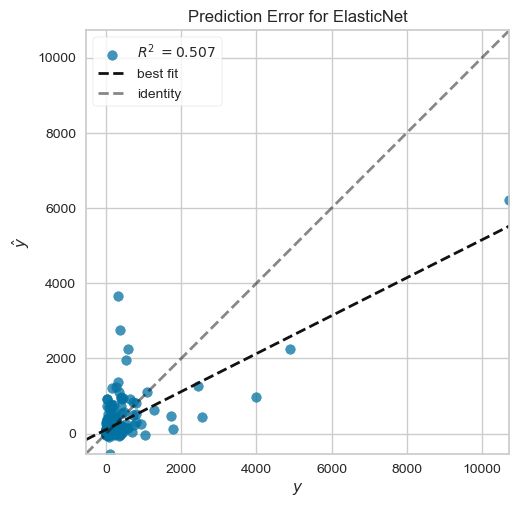

In [61]:
from yellowbrick.regressor import prediction_error
# Instantiate the linear model and visualizer
model = eNet_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

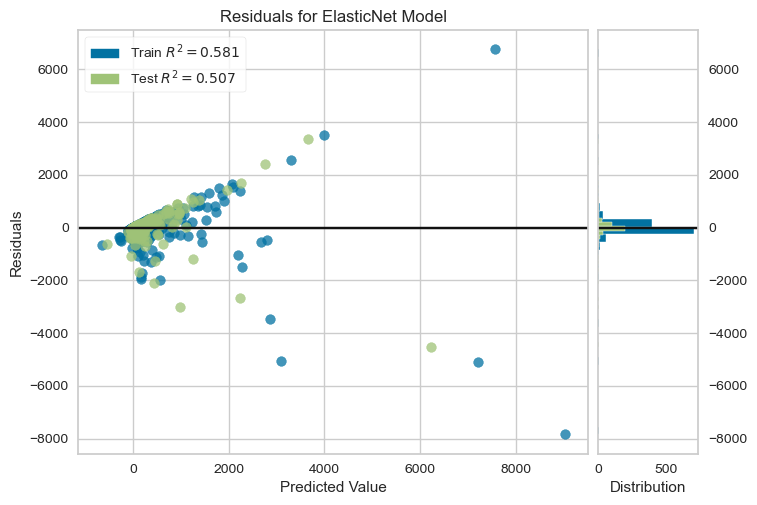

In [62]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

# Modèle Support Vector Regression (SVR)

In [63]:
from sklearn.svm import LinearSVR

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearSVR(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [64]:
GHG_svr_model = svr_grid_cv.fit(X_train, Y_train)

In [65]:
GHG_svr_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_dis...
                                                                   regressor=LinearSVR()),
                              n_jobs=-1,
                              param_grid={'regressor__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                                          'regressor__epsilon': [0, 0.01, 0.1,
                                                                 0.5, 1, 2],
                                          'regressor__loss': ['epsilon_insensitive',
                                                              'squared_epsilon_insensitive'],
                                          'regressor__max_iter': [10, 100,
                                                                  1000]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

## Meilleur Modèle

In [66]:
svr=GHG_svr_model.named_steps['grid_search_svr'].best_params_
svr

{'regressor__C': 0.0001,
 'regressor__epsilon': 2,
 'regressor__loss': 'epsilon_insensitive',
 'regressor__max_iter': 1000}

In [67]:
svr_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearSVR(C=0.0001,epsilon=2,loss='epsilon_insensitive',max_iter=1000))])

## Évaluation du modèle
### Prediction Error Plot et Residual Plot

In [68]:
GHG_svr_results = model_scores(GHG_svr_model, 'grid_search_svr',svr_model,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 164.373
Meilleur Score R2 : -0.035
Meilleurs paramètres : {'regressor__C': 0.0001, 'regressor__epsilon': 2, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 1000}
Temps moyen d'entrainement : 39.74s


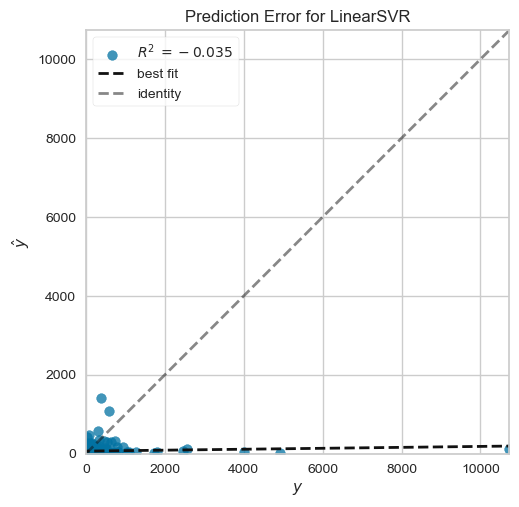

In [69]:
# Instantiate the linear model and visualizer
model = svr_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

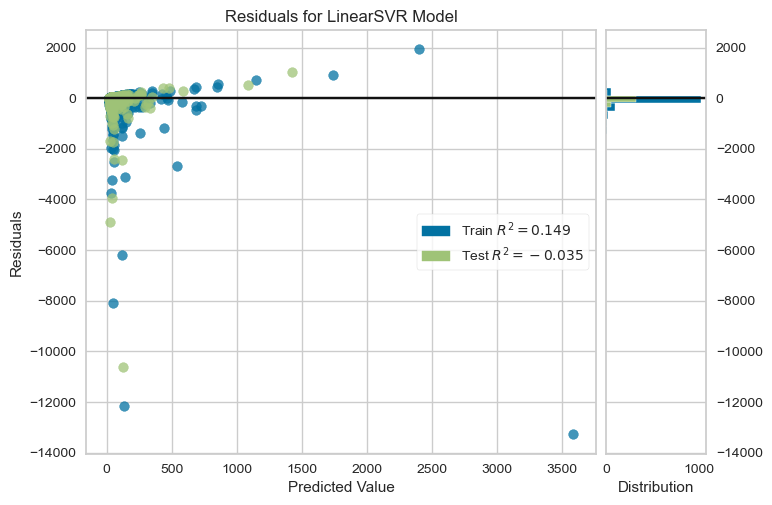

In [70]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

# Modèles non linéaires

# Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

param_rfr = {'regressor__max_features' : [1, 2],
             'regressor__max_depth': [3,5,7],
             'regressor__bootstrap' : [True,False],
             'regressor__n_estimators': [100,300],
            }

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=KFold(n_splits=10, shuffle=True, random_state=45),
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [72]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train)

In [73]:
GHG_rfr_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_dis...
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=RandomForestRegressor()),
                              n_jobs=-1,
                              param_grid={'regressor__bootstrap': [True, False],
                                          'regressor__max_depth': [3, 5, 7],
                                          'regressor__max_features': [1, 2],
                                          'regressor__n_estimators': [100,
                                                                      300]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

## Meilleur modèle 

In [74]:
rf=GHG_rfr_model.named_steps['grid_search_rfr'].best_params_
rf

{'regressor__bootstrap': False,
 'regressor__max_depth': 7,
 'regressor__max_features': 2,
 'regressor__n_estimators': 300}

In [75]:
rf_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestRegressor(bootstrap=False,max_depth=7,max_features=2,n_estimators=300))])

## Évaluation du modèle

In [76]:
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr',rf_model,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 136.797
Meilleur Score R2 : 0.701
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 7, 'regressor__max_features': 2, 'regressor__n_estimators': 300}
Temps moyen d'entrainement : 517.87s


### Prediction Error Plot et Residual Plot

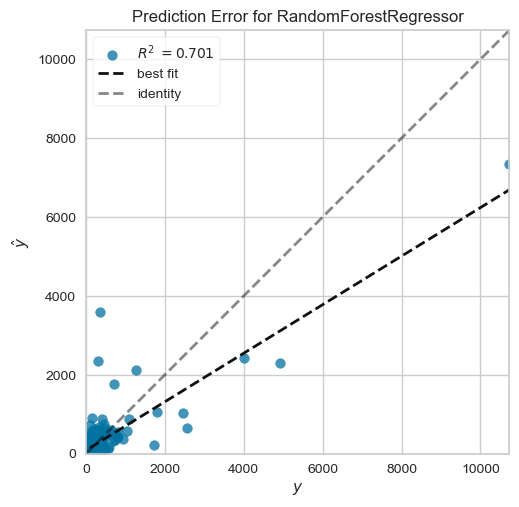

In [77]:
# Instantiate the linear model and visualizer
model = rf_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

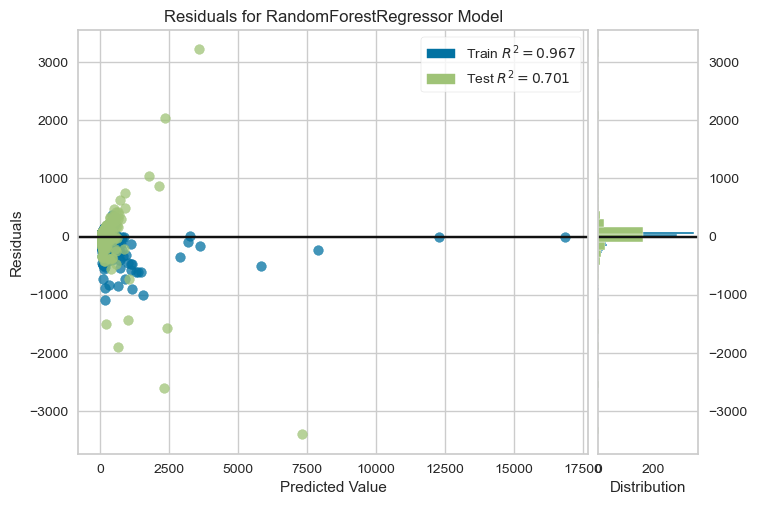

In [78]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)
# Données à stratifier pour équilibrer pour les jeux de données

# XGBoost

In [79]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

param_xgb = {'regressor__learning_rate' : [0.01, 0.04,0.10],
             'regressor__max_depth': [2.9,3,3.1],
             'regressor__n_estimators': [79,80,81],
             'regressor__reg_alpha': [0.10,0.15,0.20],
             'regressor__reg_lambda': [0.65,0.7,0.75],
             'regressor__min_child_weight' : [5],
             'regressor__gamma': [0.4,0.5,0.6],
            }

xgb = XGBRegressor()
ttr = TransformedTargetRegressor(regressor=xgb, func=np.log,inverse_func=np.exp)

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', GridSearchCV(estimator=ttr,
                            param_grid=param_xgb,
                            cv=10,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [80]:
GHG_xgb_model = xgb_grid_cv.fit(X_train, Y_train)
#GHG_xgb_results = model_scores(GHG_xgb_model, 'grid_search_xgb')

In [81]:
GHG_xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_dis...
                              param_grid={'regressor__gamma': [0.4, 0.5, 0.6],
                                          'regressor__learning_rate': [0.01,
                                                                       0.04,
                                                                       0.1],
                                          'regressor__max_depth': [2.9, 3, 3.1],
                                          'regressor__min_child_weight': [5],
                                          'regressor__n_estimators': [79, 80,
                                                                      81],
                                          'regressor__reg_alpha': [0.1, 0.15,
                                                                   0.2],
                                          'regressor__reg_lambda': [0.65, 0.7,
                                                                    0.75]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

## Meilleur Modèle

In [82]:
xgb=GHG_xgb_model.named_steps['grid_search_xgb'].best_params_
xgb

{'regressor__gamma': 0.5,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 79,
 'regressor__reg_alpha': 0.1,
 'regressor__reg_lambda': 0.65}

In [83]:
from xgboost import XGBRegressor
xgb_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", XGBRegressor(gamma=0.5,n_estimators=79,max_depth=3,learning_rate=0.1,reg_alpha=0.1,reg_lambda=0.65,min_child_weight=5))])

## Évaluation du modèle
### Prediction Error Plot et Residual Plot

In [84]:
GHG_xgb_results = model_scores(GHG_xgb_model, 'grid_search_xgb',xgb_model,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 125.469
Meilleur Score R2 : 0.773
Meilleurs paramètres : {'regressor__gamma': 0.5, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 79, 'regressor__reg_alpha': 0.1, 'regressor__reg_lambda': 0.65}
Temps moyen d'entrainement : 66.0s


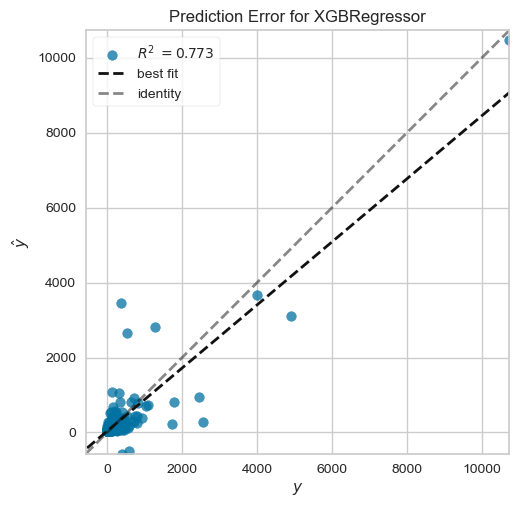

In [85]:
# Instantiate the linear model and visualizer
model = xgb_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

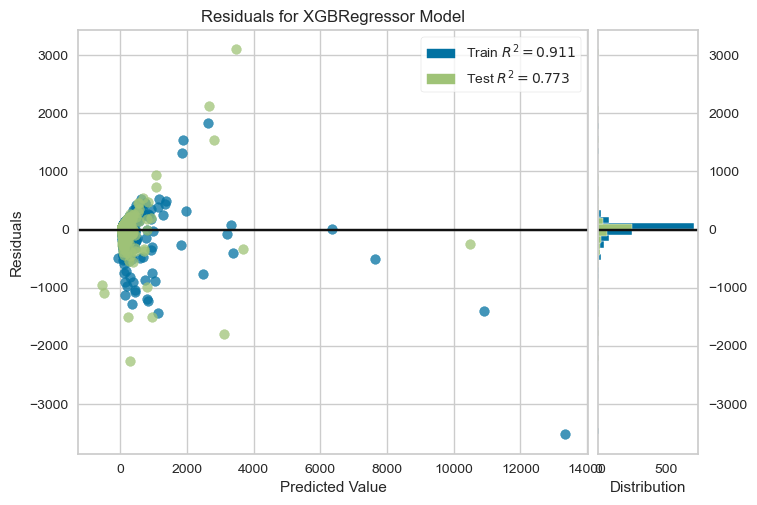

In [86]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

# Comparaison des modèles

In [87]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']
GHG_compare_metrics = pd.concat([pd.DataFrame(GHG_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(GHG_xgb_results[metrics].mean(), columns=['XGBoost']),
           pd.DataFrame(GHG_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(GHG_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(GHG_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
GHG_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest','XGBoost',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    GHG_final_metrics_compare[m] = GHG_compare_metrics.loc[m]

In [88]:
GHG_final_metrics_compare

mean_fit_time  mean_score_time  \
RandomForest           0.420011         0.026405   
XGBoost                0.053527         0.000895   
LinearSVR              0.032233         0.001449   
ElasticNet             0.007993         0.001310   
LinearRegression       0.019805         0.001917   

                  mean_test_neg_mean_absolute_error  \
RandomForest                          -1.344619e+02   
XGBoost                               -1.419174e+02   
LinearSVR                            -2.556965e+292   
ElasticNet                            -8.793773e+03   
LinearRegression                      -1.222898e+04   

                  mean_train_neg_mean_absolute_error  
RandomForest                           -1.182873e+02  
XGBoost                                -1.344242e+02  
LinearSVR                             -1.256254e+279  
ElasticNet                             -3.148489e+02  
LinearRegression                       -3.139905e+02

## Plot pour comparer les modèles 

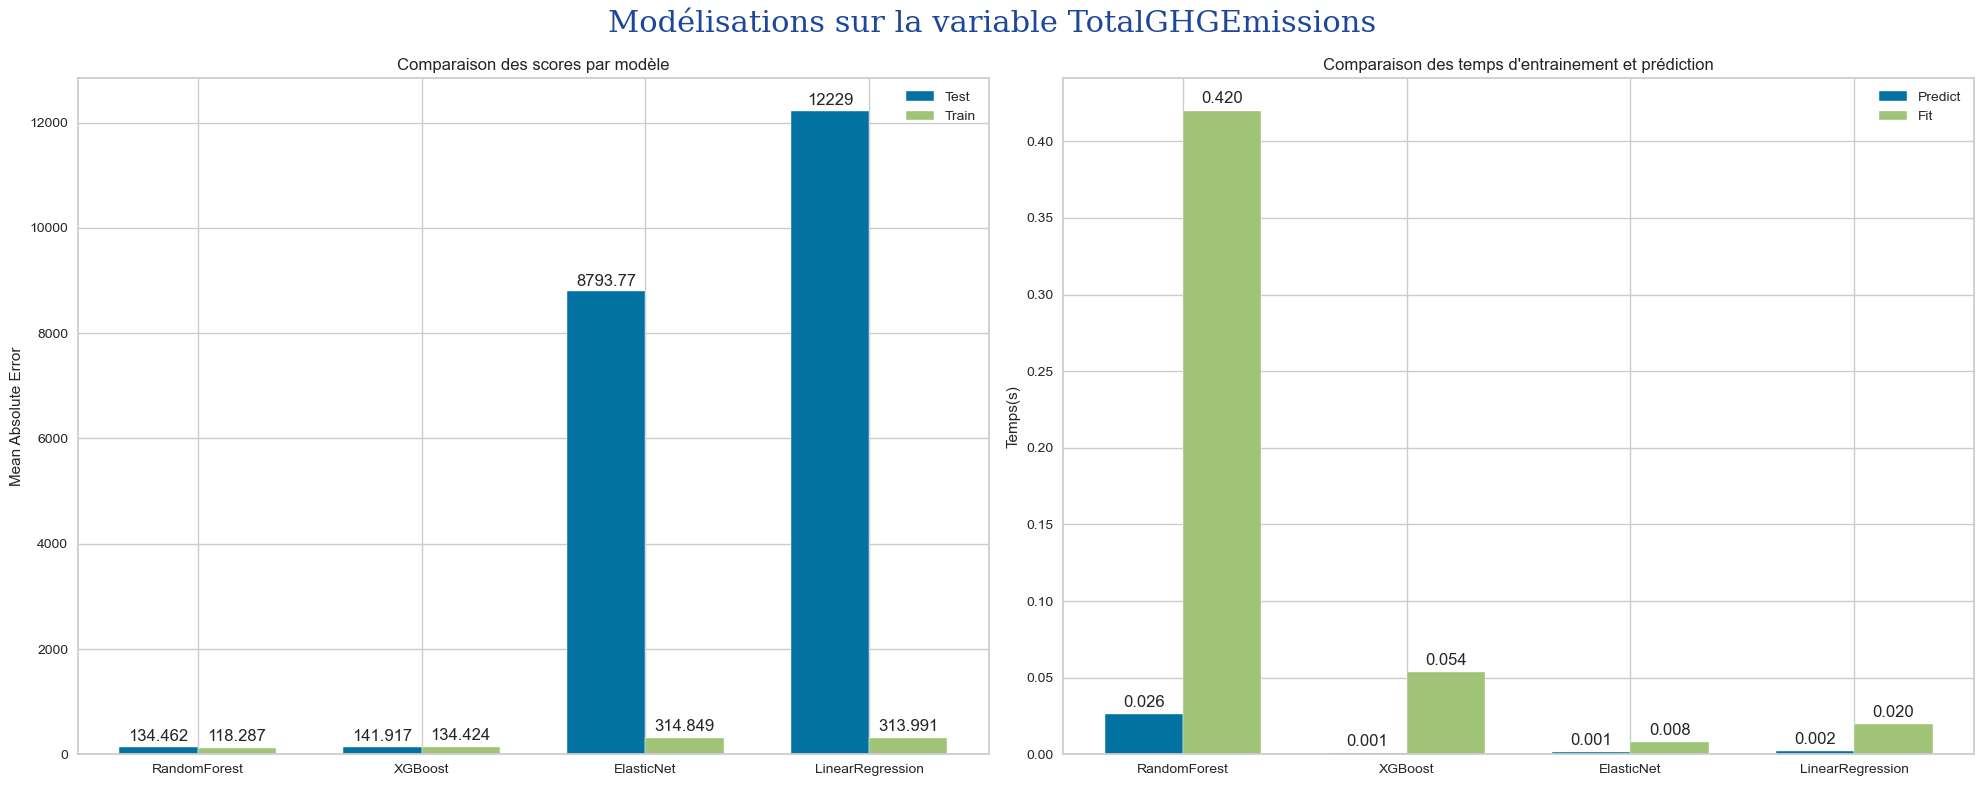

In [89]:
#On élimine le modèle SVR de cette représentation car hors normes
GHG_final_metrics_compare = GHG_final_metrics_compare[GHG_final_metrics_compare.index != 'LinearSVR']
x = np.arange(len(GHG_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*GHG_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*GHG_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(GHG_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=2)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, GHG_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, GHG_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(GHG_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable TotalGHGEmissions", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

En comparant les différents modèles, le modèle de XGBoost semble être le plus adapté car il est le plus précis (R² est plus proche de 1) et a un temps d'éxécution moindre que le random forest regressor.

## Affichage GridScore et meilleurs hyperparamètres

In [90]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    ## Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_absolute_error']
    stds_test = results['std_test_neg_mean_absolute_error']
    means_train = results['mean_train_neg_mean_absolute_error']
    stds_train = results['std_train_neg_mean_absolute_error']

    ## Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    
    ## Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontdict=font_title, fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN ABSOLUTE ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

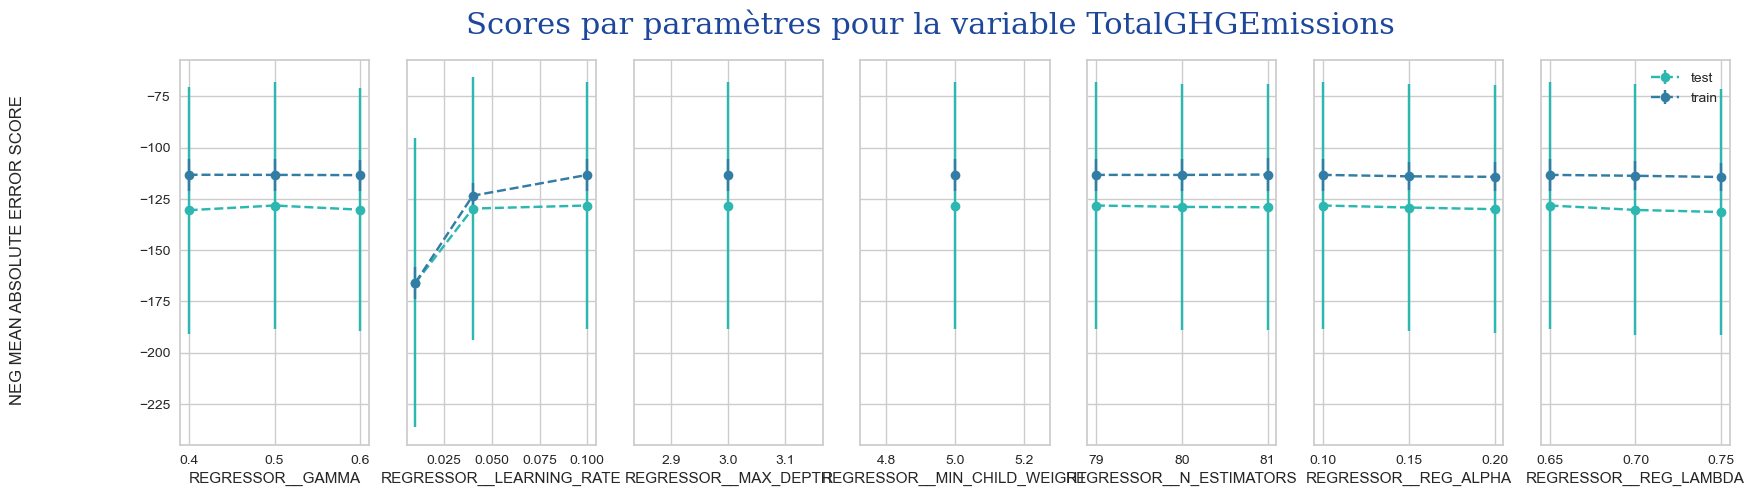


Rappel des meilleurs paramètres :
{'regressor__gamma': 0.5, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 79, 'regressor__reg_alpha': 0.1, 'regressor__reg_lambda': 0.65}


In [91]:
plot_search_results(GHG_xgb_model.named_steps['grid_search_xgb'], title="TotalGHGEmissions")

In [92]:
xgb=GHG_xgb_model.named_steps['grid_search_xgb'].best_params_
xgb

{'regressor__gamma': 0.5,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 79,
 'regressor__reg_alpha': 0.1,
 'regressor__reg_lambda': 0.65}

### Modèle final XGB

In [93]:
xgb_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", XGBRegressor(gamma=0.5,n_estimators=79,max_depth=3,learning_rate=0.1,reg_alpha=0.1,reg_lambda=0.65,min_child_weight=5))])

# Feature importances 

In [94]:
import eli5
xgb_model.fit(X_train, Y_train)
eli5.show_weights(xgb_model.named_steps["model"])

In [95]:
ohe_categories = preprocessor.named_transformers_["one_hot"].categories_
#target_categories=preprocessor.named_transformers_["target"].categories_
ord_categories=preprocessor.named_transformers_["ord"].categories_
new_ohe_features=[f"{col}__{val}" for col, vals in zip(one_hot_features, ohe_categories) for val in vals]
#new_target_features=[f"{col}__{val}" for col, vals in zip(target_features, target_categories) for val in vals]


In [96]:
all_features = numeric_features + new_ohe_features + target_features + ord_features

In [97]:
eli5.show_weights(xgb_model.named_steps["model"], feature_names=all_features)

In [98]:
i = 4
eli5.show_prediction(xgb_model.named_steps["model"], 
                     xgb_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

# SHAP Plots

In [99]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [100]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [101]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

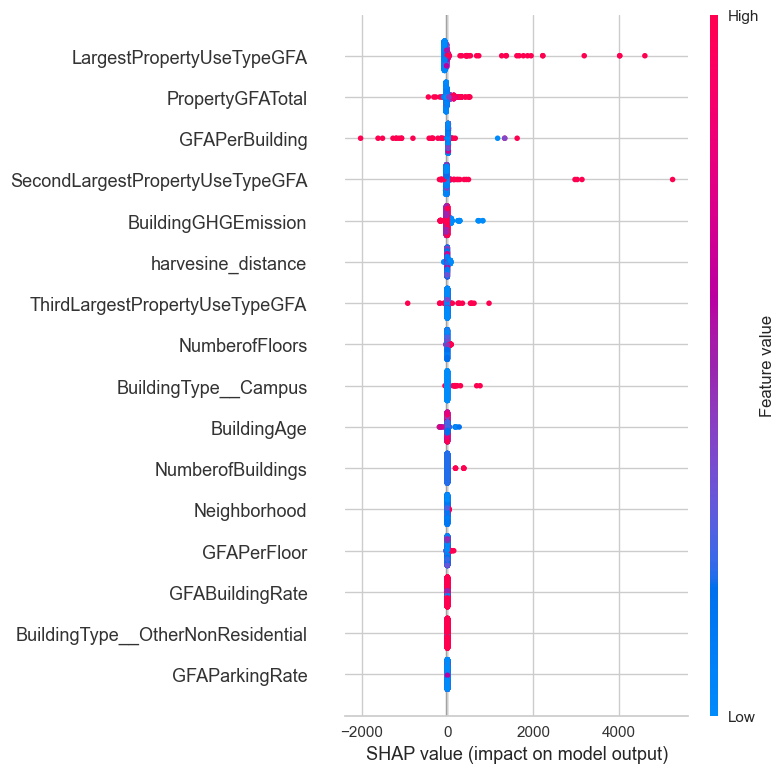

In [102]:
i = 5
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

## Summary plot

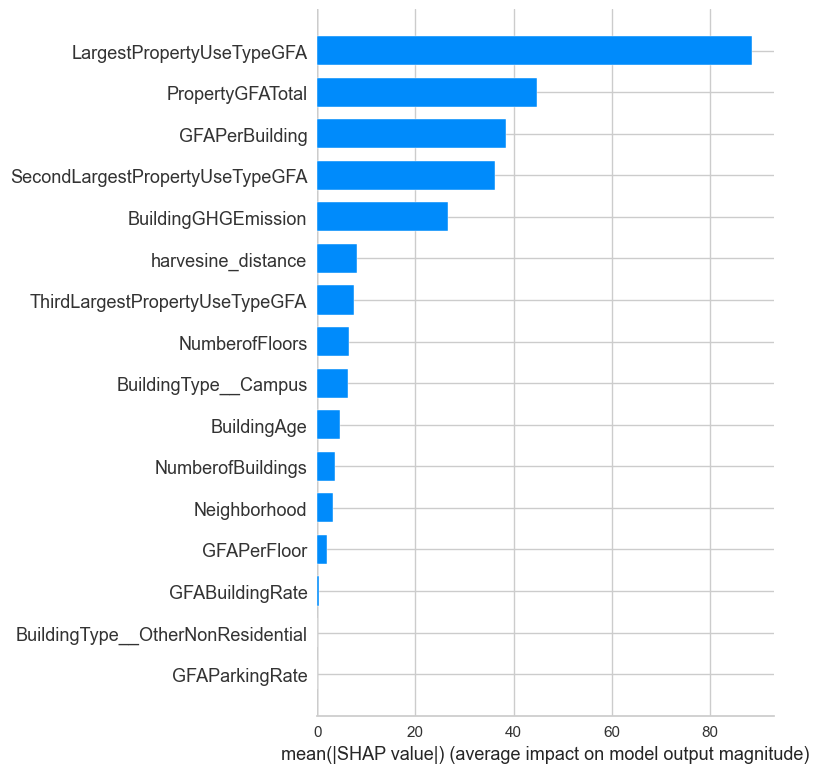

In [103]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features, plot_type='bar')

Nous pouvons déduire les principales variables influençant le modèle grâce au shap et envisager un modèle uniquement avec les premières features du shap. 

On remarque que la surface des batîments joue un rôle crucial sur les émissions de GHG et aussi en 5ème position, on observe que le type de batîment influence aussi les émissions.. 

## Force plot

In [104]:
i = 4
shap.force_plot(explainer.expected_value, shap_values, features=observations, feature_names=all_features)

# Évaluation du modèle

In [105]:
from sklearn.metrics import  make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def test_model(clf,train,y):
        cv = 10
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
the_scores=test_model(xgb_model,X_train,Y_train)
xgb_model.fit(X_train,Y_train)
y_pred=xgb_model.predict(X_test)
validation_score=r2_score(Y_test,y_pred)

In [106]:
y_test=Y_test
df_res=pd.DataFrame({"True values": y_test,"Predictions":y_pred})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

True values  Predictions       Error color to use
1487        14.19    46.154945  225.263886      #cc2900
1593        42.20   258.440125  512.417357      #cc2900
1459        60.83    65.507744    7.689863      #13a90d
254        337.97   816.161621  141.489369      #cc2900
1477        51.89    90.364731   74.146716      #dfa61f

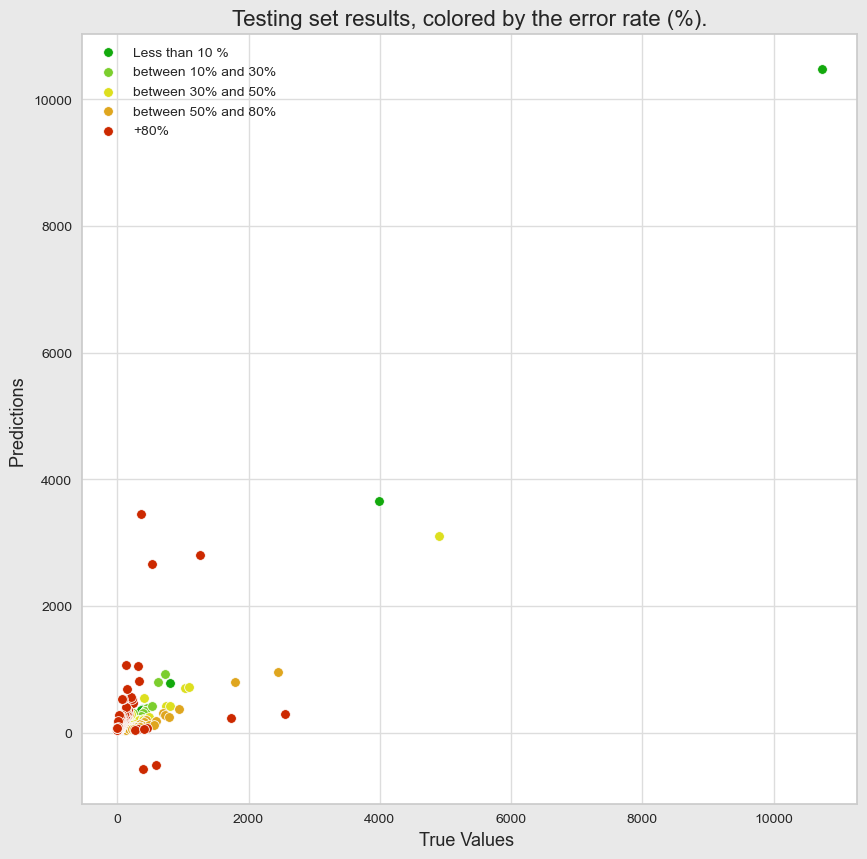

In [107]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')

In [108]:
def regroup(num):
    if num<50:
        return "- 50"
    elif num<150:
        return "50-150"
    elif num<250:
        return "150-250"
    else:
        return "+250"
df_res["regroup"]=df_res["True values"].apply(regroup)
df_res=df_res.sort_values(by = "True values")

Text(0.5, 0, 'TotalGHGEmissions')

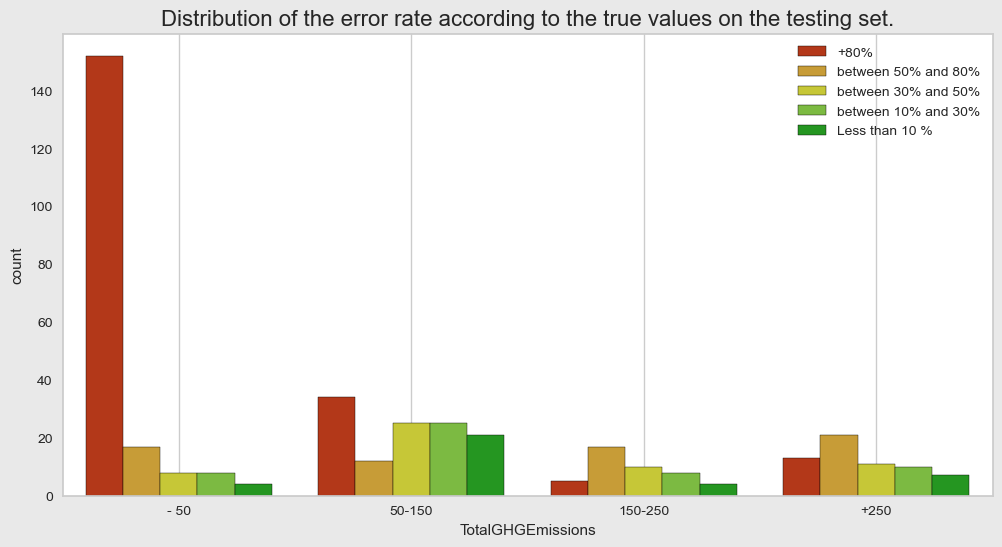

In [109]:
fig=plt.figure(figsize=[12,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the error rate according to the true values on the testing set.",size=16)
sns.countplot(data=df_res,x="regroup",hue="color to use",hue_order=dict_lab.keys(),palette=['#cc2900', '#dfa61f', '#dddf1f', '#7cce2e', '#13a90d'], edgecolor="black")
plt.legend(dict_lab.values())
plt.grid()
plt.xlabel("TotalGHGEmissions")

Les données avec une basse émission ont une erreur plus élevée que ceux avec une émission moyenne ou élevée. 

3.8798278790414664


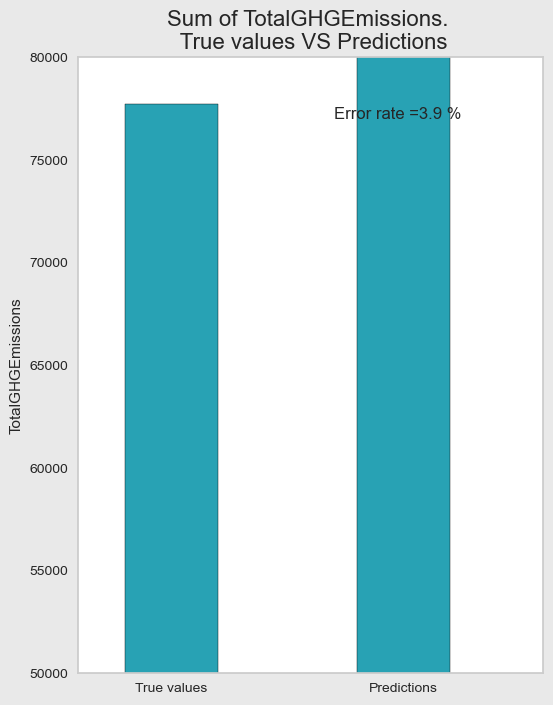

In [110]:
t,p=df_res["True values"].sum(),df_res["Predictions"].sum()
error=abs(t-p)/t*100
print(error)

fig=plt.figure(figsize=[6,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Sum of TotalGHGEmissions. \n True values VS Predictions",size=16)
plt.bar(x=[1,2],height=[df_res["True values"].sum(),df_res["Predictions"].sum()],color="#28a2b4",width=0.4, edgecolor="black")
plt.xticks([1,2],["True values","Predictions"])
plt.text(1.7,77000,"Error rate ={} %".format(round(error,1)),size=12)
plt.ylabel("TotalGHGEmissions")
plt.ylim(50000,80000)
plt.xlim(0.6,2.6)
plt.grid()

Le modèle a une erreur de prédiction d'environ 3.9%. 

# Influence of EnergyStarScore

In [111]:
#Ajout de la variable à nos variables X
energystar_score = data['ENERGYSTARScore']
X['energystar_score'] = energystar_score
#Ajout de la variable dans les variables numérique du preprocessor
numeric_features.append('energystar_score')

In [112]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['energystar_score'].isnull()==False]
Y = Y[Y.index.isin(list(X.index))]

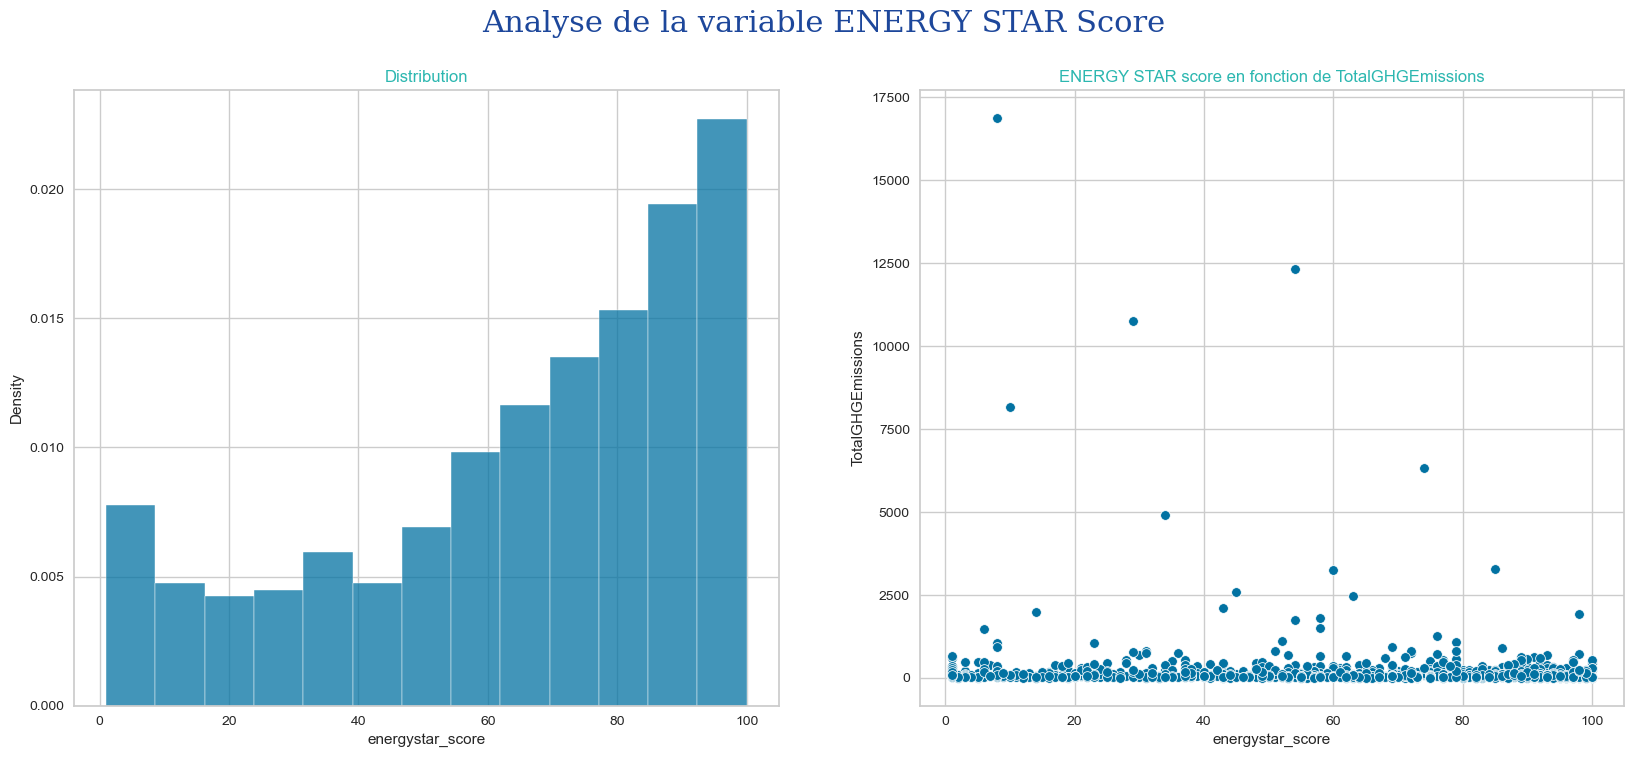

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=pd.concat([X,Y], axis=1), y='TotalGHGEmissions', x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de TotalGHGEmissions", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontdict=font_title, fontsize=22)
plt.show()

La distribution semble homogène. Nous allons maintenant inclure cette variable dans tous les modèles et comparer les résultats avec ceux obtenus avec XGBoost optimisé sans Energy Star Score. 

In [129]:
# Création du jeu de données Test et de Validation 
Y=Y+10**-12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50,shuffle=True)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 810 lignes,
Test: 271 lignes.



## Tests des différents modèles avec EnergyStarScore

In [130]:
# Essai modèle linéaire
GHG_mlr_model_estar = mlr_grid_cv.fit(X_train, Y_train)

In [132]:
lm_estar=GHG_mlr_model_estar.named_steps['grid_search_mlr'].best_params_
lm_estar

{'regressor__fit_intercept': True, 'regressor__normalize': True}

In [134]:
linear_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearRegression(fit_intercept=True,normalize= True))])

In [143]:
GHG_mlr_results_estar = model_scores(GHG_mlr_model_estar, 'grid_search_mlr',linear_model_estar,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 180.776
Meilleur Score R2 : 0.598
Meilleurs paramètres : {'regressor__fit_intercept': True, 'regressor__normalize': True}
Temps moyen d'entrainement : 14.38s


In [136]:
# Essai modèle ElasticNet
GHG_eNet_model_estar = eNet_grid_cv.fit(X_train, Y_train)

In [137]:
eNet_estar=GHG_eNet_model_estar.named_steps['grid_search_enet'].best_params_
eNet_estar

{'regressor__alpha': 1.0,
 'regressor__l1_ratio': 1.0,
 'regressor__max_iter': 10}

In [138]:
eNet_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", ElasticNet(alpha=1.0,l1_ratio=1.0,max_iter=10))])

In [150]:
GHG_eNet_results_estar = model_scores(GHG_eNet_model_estar, 'grid_search_enet',eNet_model,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 163.496
Meilleur Score R2 : 0.597
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 1.0, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 5.29s


In [140]:
# Essai Modèle SVR
GHG_svr_model_estar = svr_grid_cv.fit(X_train, Y_train)

In [141]:
svr_estar=GHG_svr_model_estar.named_steps['grid_search_svr'].best_params_
svr_estar

{'regressor__C': 0.1,
 'regressor__epsilon': 0.1,
 'regressor__loss': 'epsilon_insensitive',
 'regressor__max_iter': 100}

In [142]:
svr_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearSVR(C=0.1,epsilon=0.1,loss='epsilon_insensitive',max_iter=100))])

In [146]:
GHG_svr_results = model_scores(GHG_svr_model_estar, 'grid_search_svr',svr_model_estar,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 138.183
Meilleur Score R2 : 0.101
Meilleurs paramètres : {'regressor__C': 0.1, 'regressor__epsilon': 0.1, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 100}
Temps moyen d'entrainement : 19.31s


In [151]:
# Essai Random Forest Regressor
GHG_rfr_model_estar = rfr_grid_cv.fit(X_train, Y_train)

In [152]:
rf_estar=GHG_rfr_model_estar.named_steps['grid_search_rfr'].best_params_
rf_estar

{'regressor__bootstrap': False,
 'regressor__max_depth': 7,
 'regressor__max_features': 2,
 'regressor__n_estimators': 100}

In [153]:
rf_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestRegressor(bootstrap=False,max_depth=7,max_features=2,n_estimators=100))])

In [154]:
GHG_rfr_results_estar = model_scores(GHG_rfr_model_estar, 'grid_search_rfr',rf_model_estar,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 107.363
Meilleur Score R2 : 0.828
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 7, 'regressor__max_features': 2, 'regressor__n_estimators': 100}
Temps moyen d'entrainement : 344.4s


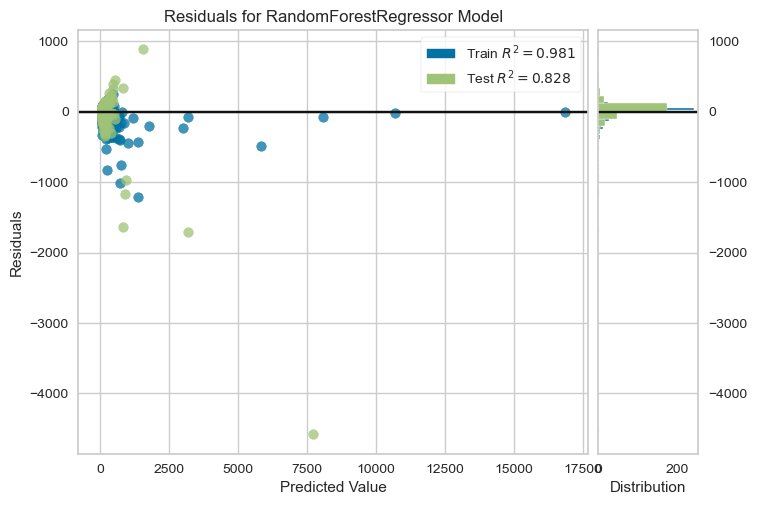

In [155]:
# Instantiate the linear model and visualizer
model = rf_model_estar
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

In [160]:
# Essai XGBoost
GHG_xgb_model_estar = xgb_grid_cv.fit(X_train, Y_train)

In [162]:
xgb_estar=GHG_xgb_model_estar.named_steps['grid_search_xgb'].best_params_
xgb_estar

{'regressor__gamma': 0.6,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 81,
 'regressor__reg_alpha': 0.2,
 'regressor__reg_lambda': 0.7}

In [163]:
from xgboost import XGBRegressor
xgb_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", XGBRegressor(gamma=0.6,n_estimators=81,max_depth=3,learning_rate=0.1,reg_alpha=0.2,reg_lambda=0.7,min_child_weight=5))])

In [164]:
GHG_xgb_results_estar = model_scores(GHG_xgb_model_estar, 'grid_search_xgb',xgb_model_estar,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 113.932
Meilleur Score R2 : 0.698
Meilleurs paramètres : {'regressor__gamma': 0.6, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 81, 'regressor__reg_alpha': 0.2, 'regressor__reg_lambda': 0.7}
Temps moyen d'entrainement : 33.41s


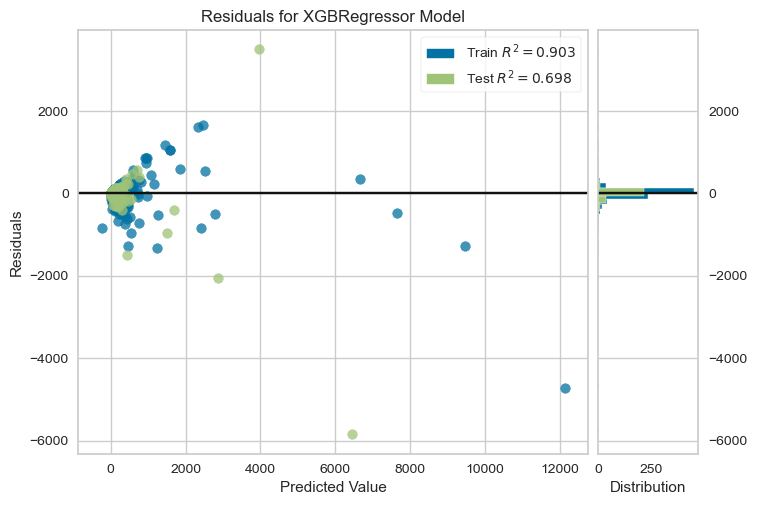

In [165]:
# Instantiate the linear model and visualizer
model = xgb_model_estar
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

### Features importance avec EnergyStarScore

In [166]:
# Need to load JS vis in the notebook
shap.initjs() 

In [168]:
explainer = shap.TreeExplainer(rf_model_estar.named_steps["model"])

In [171]:
observations = rf_model_estar.named_steps["preprocessor"].transform(X_train.sample(500, random_state=42))
shap_values = explainer.shap_values(observations)

In [173]:
ohe_categories = preprocessor.named_transformers_["one_hot"].categories_
#target_categories=preprocessor.named_transformers_["target"].categories_
ord_categories=preprocessor.named_transformers_["ord"].categories_
new_ohe_features=[f"{col}__{val}" for col, vals in zip(one_hot_features, ohe_categories) for val in vals]
#new_target_features=[f"{col}__{val}" for col, vals in zip(target_features, target_categories) for val in vals]
all_features = numeric_features + new_ohe_features + target_features + ord_features

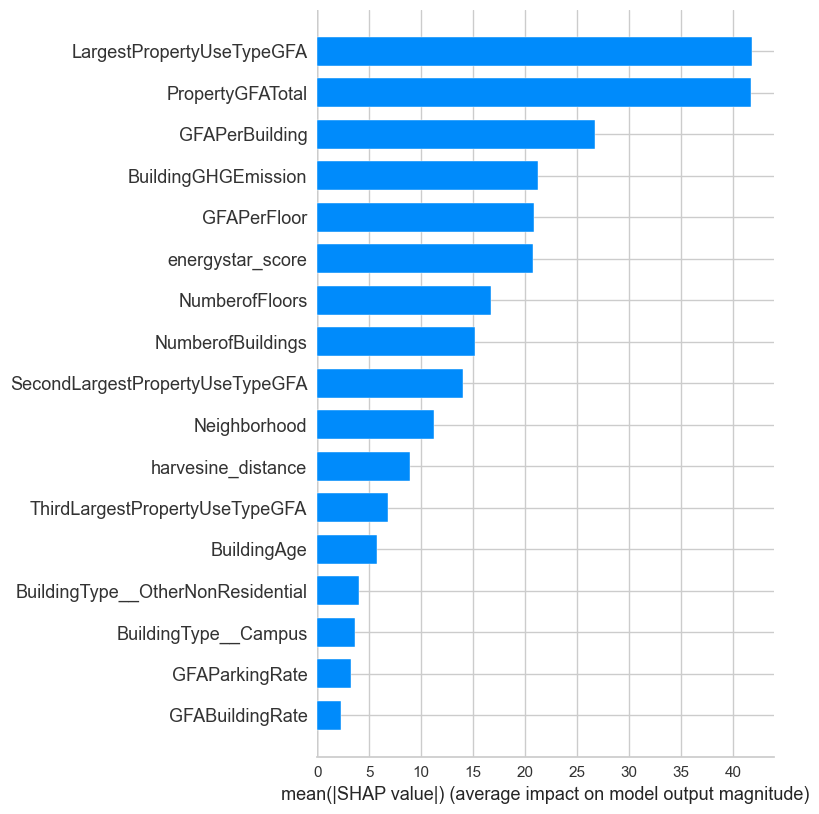

In [177]:
i = 5
shap.summary_plot(shap_values, features=observations, feature_names=all_features, plot_type='bar')

### Conclusion : 
Avec la variable EnergyStarScore, on gagne de 0.1 en R² en comparant les résultats obtenus par le random forest regressor et ceux du XGBoost obtenus sans utilisation de la variable. Il faut en effet, évaluer à l'aide des experts si cela vaut le coût d'investir sur l'obtention de cette variable car des modélisations assez correctes sont possibles même sans l'utilisation de la variable. 

De plus, la variable intervient en 5ème position dans le SHAP Features Summary Plot. Donc, cette variable n'est pas la feature dominante. 

### Metrics EStar

In [121]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [122]:
#Modèle avec les meilleurs paramètres pour les émissions de CO2

import time
start_time = time.time()

GHG_pred = xgb_model_estar.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.013 s.


In [123]:
#Calcul des métriques pour les émissions de CO2
sitemetrics = metrics_model(Y_test,GHG_pred)
sitemetrics

Métrique   Résultats
0      MAE  113.932015
1       R²    0.698401

In [124]:
GHG_pred_star = xgb_model_estar.predict(X_test)
#Calcul des métriques pour les émissions de CO2
sitemetricsES = metrics_model(Y_test,GHG_pred)
sitemetrics = sitemetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
sitemetrics['Avec ENERGY STAR'] = sitemetricsES['Résultats']
sitemetrics

Métrique  Sans ENERGY STAR  Avec ENERGY STAR
0      MAE        113.932015        113.932015
1       R²          0.698401          0.698401

In [125]:
def plot_pred_true(y_true, y_pred, x_max=None,y_max=None,color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.xlim(0,x_max)
    plt.ylim(0,y_max)
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
              fontdict=font_title, fontsize=18)
    plt.show()

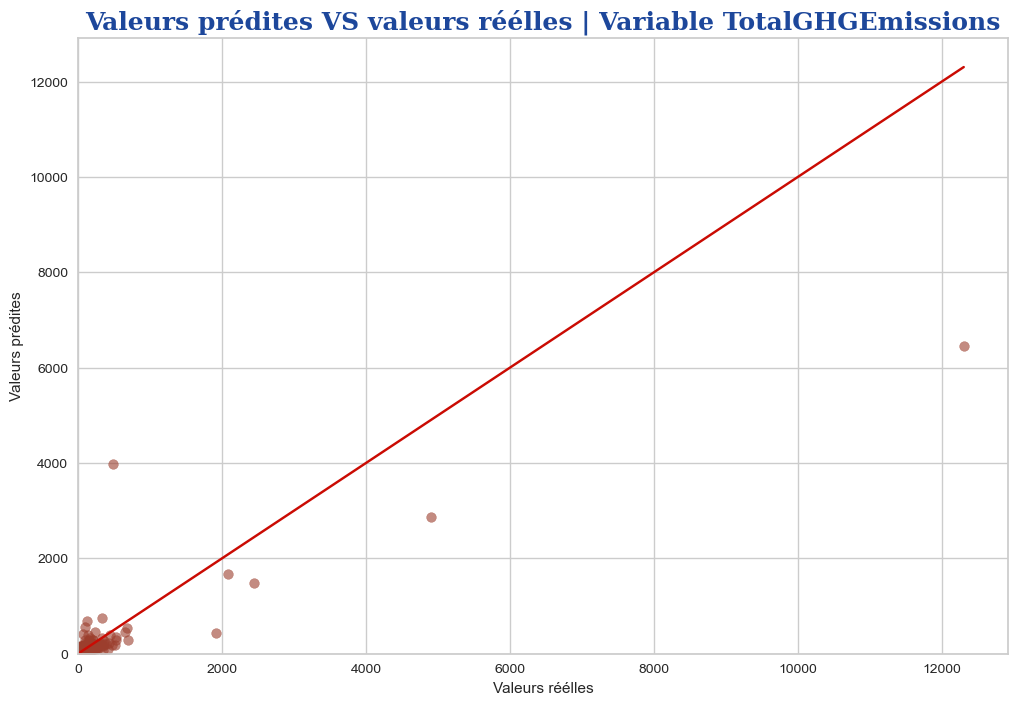

In [126]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test,GHG_pred_star, color="#9C3E2D",title="TotalGHGEmissions")

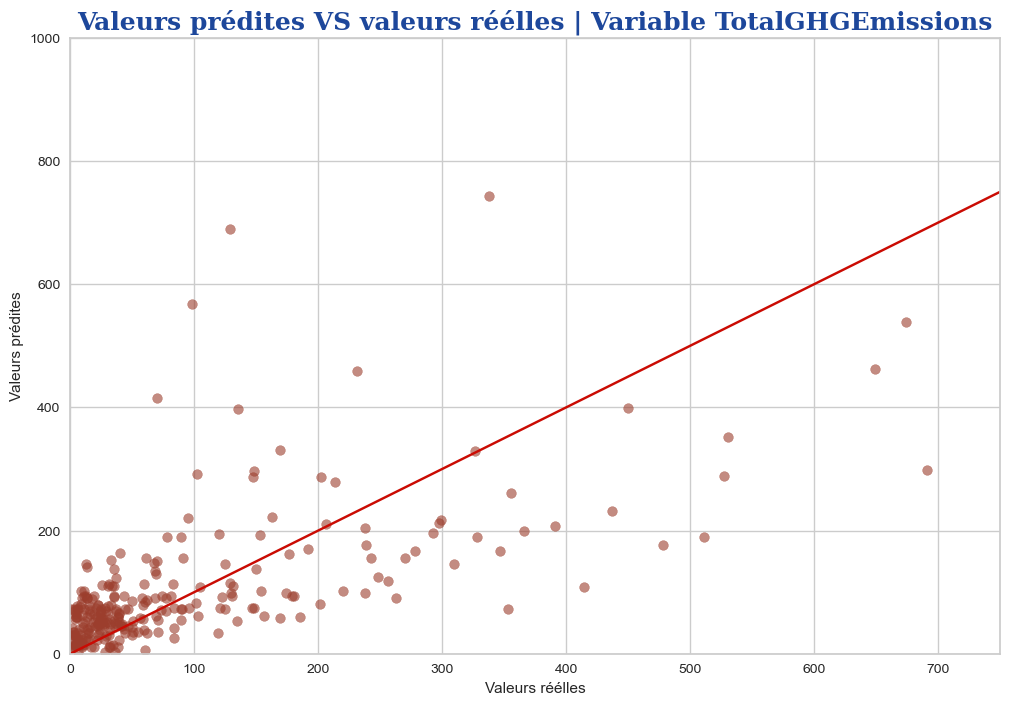

In [127]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test,GHG_pred_star, color="#9C3E2D", x_max=750,y_max=1000, title="TotalGHGEmissions")

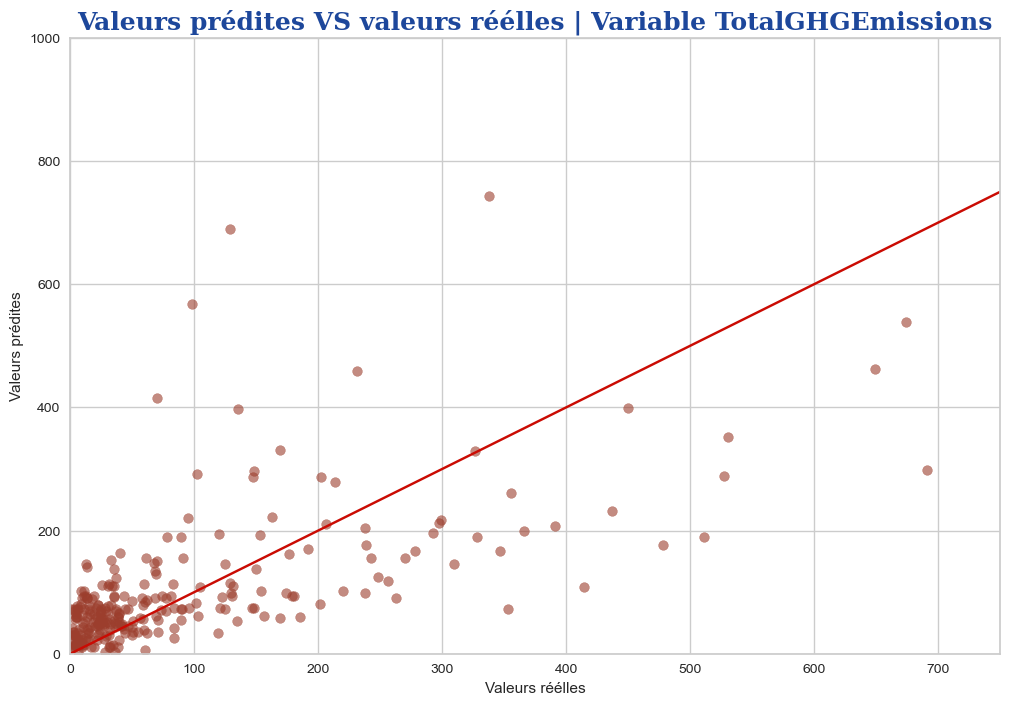

In [128]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test,GHG_pred, color="#9C3E2D", x_max=750,y_max=1000, title="TotalGHGEmissions")

# Target Encoding Only Results 

# Modélisation avec Uniquement les tops 5 features 

In [178]:
df.columns

Index(['BuildingType', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'BuildingAge', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance',
       'BuildingGHGEmission'],
      dtype='object')

In [179]:

X = df.drop(['TotalGHGEmissions','BuildingType', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors','ThirdLargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'BuildingAge', 'GFABuildingRate', 'GFAParkingRate','GFAPerFloor', 'harvesine_distance'], axis=1)
Y = df.TotalGHGEmissions
Y=Y+10**-12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50,shuffle=True)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))


Entrainement: 1233 lignes,
Test: 412 lignes.



In [180]:
#Ordinal Encoding
ord_features2=['BuildingGHGEmission']
ord_transformer2=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

#Numerical Transformer
numeric_features2 = ['PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','GFAPerBuilding']

numeric_transformer2 = RobustScaler(unit_variance=True)



#General preprocessor
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num2', numeric_transformer2, numeric_features2),
        ('ord2', ord_transformer2, ord_features2)
    ]
)


In [182]:

rfr_grid_cv2 = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_rfr2', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=KFold(n_splits=10, shuffle=True, random_state=45),
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [184]:
GHG_rfr_model2 = rfr_grid_cv2.fit(X_train, Y_train)

In [186]:
GHG_rfr_model2

Pipeline(steps=[('preprocessor2',
                 ColumnTransformer(transformers=[('num2',
                                                  RobustScaler(unit_variance=True),
                                                  ['PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'GFAPerBuilding']),
                                                 ('ord2',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BuildingGHGEmission'])])),
                ('grid_search_rfr2',
                 GridSearchCV(cv=KFo...
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=RandomForestRegressor()),
                              n_jobs=-1,
                              param_grid={'regressor__bootstrap': [True, False],
                                          'regressor__max_depth': [3, 5, 7],
                                          'regressor__max_features': [1, 2],
                                          'regressor__n_estimators': [100,
                                                                      300]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

In [188]:
rf2=GHG_rfr_model2.named_steps['grid_search_rfr2'].best_params_
rf2

{'regressor__bootstrap': False,
 'regressor__max_depth': 7,
 'regressor__max_features': 2,
 'regressor__n_estimators': 100}

In [189]:
rf_model2= Pipeline([("preprocessor2", preprocessor2), 
                     ("model", RandomForestRegressor(bootstrap=False,max_depth=7,max_features=2,n_estimators=100))])

In [190]:
GHG_rfr_results2 = model_scores(GHG_rfr_model2, 'grid_search_rfr2',rf_model2,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 134.192
Meilleur Score R2 : 0.67
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 7, 'regressor__max_features': 2, 'regressor__n_estimators': 100}
Temps moyen d'entrainement : 577.04s


In [191]:
# XGBoost
xgb_grid_cv2 = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_xgb2', GridSearchCV(estimator=ttr,
                            param_grid=param_xgb,
                            cv=10,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])


In [192]:
GHG_xgb_model2 = xgb_grid_cv2.fit(X_train, Y_train)

In [193]:
xgb2=GHG_xgb_model2.named_steps['grid_search_xgb2'].best_params_
xgb2

{'regressor__gamma': 0.6,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 79,
 'regressor__reg_alpha': 0.1,
 'regressor__reg_lambda': 0.75}

In [195]:
xgb_model2= Pipeline([("preprocessor2", preprocessor2), 
                     ("model", XGBRegressor(gamma=0.6,n_estimators=79,max_depth=3,learning_rate=0.1,reg_alpha=0.1,reg_lambda=0.75,min_child_weight=5))])

In [196]:
GHG_xgb_results2 = model_scores(GHG_xgb_model2, 'grid_search_xgb2',xgb_model2,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 140.084
Meilleur Score R2 : 0.665
Meilleurs paramètres : {'regressor__gamma': 0.6, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 79, 'regressor__reg_alpha': 0.1, 'regressor__reg_lambda': 0.75}
Temps moyen d'entrainement : 43.36s
